# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Defining goals](#defining-goals)
* [3. Libraries and Custom Functions](#import-packages)
* [4. Data Exploration/Prep](#data-prep)
* [5. Machine Learning Model](#ml_model)
* [6. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

One of the main factors that affect the effectiveness of the revenue management is the rate of cancellations and its impact on the occupancy of the hotel. Nowadays, Majority of people likely book hotel through the online booking programs. This means that the sneaky guests will have learned to take advantage of these fairly unrestrictive cancellation policies by booking multiple reservations and simply waiting until almost free cancellation time to select and book the hotel with the best rate, then cancel the rest. Digging into more data, I found that from 2014 to 2018, the global average of cancellation rate is almost 40%! With this high proportion, it produces a very negative impact on hotel revenue and distribution management strategies as can be seen by the bar chart below. <img src='https://assets1.hospitalitytech.com/styles/max_width_800/s3/2019-04/Capture-d%E2%80%99e%CC%81cran-2019-04-18-a%CC%80-18.57.07.png?itok=eMrLKJiu' /> 
Therefore, as a Data Scientist, to build a model which accurate so high that can help predict which characteristics will likely cancel the booking, in returns, will help generate tons of revenue while also, save a lot of cost as well! By that, I will find the best model to be the ultimate winner for this project.

<img src='https://ww1.prweb.com/prfiles/2014/05/16/11960308/HT_exterior2.jpg' />

**Actually there are tons of researches/ articles that can be very useful in these project!!!**    
#### References:
https://www.bookwize.com/blog/manage-your-cancellation-rate/#:~:text=One%20of%20the%20main%20factors%20that%20affect%20the,percentage%20of%20cancellations%20and%20re-sell%20the%20cancelled%20rooms.</br>
https://hospitalitytech.com/global-cancellation-rate-hotel-reservations-reaches-40-average

#### Questions to think about after doing the research about guests' cancellation and before doing all the rest regarding predictive model that has to be answered first:

- How many data (in each relevant feature) should I gather? How many of them considering enough?
- How long it should take to conduct a model? Timeframe?
- How many models do I need to take into consideration to compare and find the best one?
- Where can I find relevant raw data and collect them to perform a mdel from ML? How reliable they are? 
- Do GridSearhCV need in this? Approximately how long it will take to run?   

# 2. Defining goals <a class="anchor" id="defining-goals"></a>

#### Questions to think about goals in general:
>**Problem that I am trying to solve? (What is my goal from this model prediction?)**<br>
> - I want to find the best model to use in indicating which characteristic features relate with the decision whether to cancel the hotel booking or not. This will allow hotel to set new business model or make a reasonable decision whether to prepare a room for that particular guest or not.   

>**Why is it important to predict the cancellation?  *Who cares? Once the model is being done, who will get the most advantage from this?, What are the possible actions that could be taken as a result of this work?**<br>
> - Hotel owners and staffs will deffinitely care! This is because to know precisely which characteristic will going to cancel,  the staffs do not need to prepare rooms for those guests, the hotel owners will not lose a revenue and give those rooms to other guests which will definitely check-in for sure.<br>

>**Can I get sue from this if my model is unreliable?**<br>
> - I can! if my model is wrong and costs loss to a large chain of international hotels using my model as a cancel status indicator, I will either get fired or sue for sure! So better keeping that in mind.   
 
 <span style="color:red"><b>**MAKE SURE** to check limitations or challenges before working on buding model such as laws, data ownership, the availability of data and so on.</b></span>

### Future references use:
<span style="color:orange"><b>NOTE: Incase my datatable needs to merge or combine to other tables! [Read this link to do so (:](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html#:~:text=To%20combine%20this%20information%20into%20a%20single%20DataFrame%2C,automatically%20joins%20using%20this%20column%20as%20a%20key.)</b></span>

#### First things to do when decided to build a model!!!

 **1. Import pandas:** [What is pandas and how to use it](https://www.w3schools.com/python/pandas/pandas_intro.asp)
 
 **- remember to shorten the words by 'as' to help make things easier!**
 
 **2. Use SKLearn:** [What is SKLearn?](https://scikit-learn.org/stable/getting_started.html)
 
 **3. Decide which Linear model to use:** [LogisticRegression and when to use it](https://realpython.com/linear-regression-in-python/#what-is-regression) **<span style="color:red"><b>(Frequently use! to predict target variable(y) including this heart disease prediction model!!!)</b></span>**
| [OLS and when to use it ](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares)| [other model functions and when to use them](https://scikit-learn.org/stable/modules/linear_model.html#)

 **4. Import numpy:** [What is numpy and how to use it ](https://www.educba.com/what-is-numpy/)
 
 **5. Import math:** [Which functions are available](https://www.w3schools.com/python/python_math.asp) 
 
 **6. Import seaborn:** [What visualizations can we utilize in seaborn](https://www.analyticsvidhya.com/blog/2019/09/comprehensive-data-visualization-guide-seaborn-python/#:~:text=Seaborn%20is%20an%20amazing%20Python%20visualization%20library%20built,or%20trends%20that%20might%20not%20be%20obvious%20initially.)
 
 **7. Import matplotlib.pyplot:** [matplotlip cheat sheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png)
 
 **8. Plotly:** [What is plotly and what can plotly do](https://plotly.com/python/plotly-express/)
 
 **9: statsmodels:** [What is statsmodels](https://www.statsmodels.org/stable/)

# 3. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

In [1]:
import pandas as pd                                                    # Doing this to import "pandas" which is one of the 
                                                                       # python packages and shorten it as "pd" word to read 
                                                                       # + manage + analyze my data.
pd.set_option('display.max_columns', None)                             # helping to see everything!
pd.options.display.float_format = '{:.2f}'.format                      # for removing the scientific sign!
import numpy as np                                                     # Importing this to help generating numerical value.

# Graphics
import seaborn as sns                                                  # Importing all these python visualizations to help 
import matplotlib.pyplot as plt                                        # with the interpretation! 
import plotly.graph_objects as go

# train_test_split: Help simulate how a model would perform on new/unseen data
# cross_val_score: is a method which runs cross validation on a dataset to test whether the model can generalise over 
#                 the whole dataset
# GridSearchCV: a useful tool to fine tune the parameters of your model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
# SelectFromModel: for extracting best features of given dataset according to the importance of weights
# SelectPercentile: Generates a direct search function that selects a fraction, given as a percentage, of the total number 
#                   of available features
from sklearn.feature_selection import SelectFromModel, SelectPercentile
# f1_score: 2 * (precision * recall) / (precision + recall) 
# confusion_matrix: a specific table layout that allows visualization of the performance of an algorithm
from sklearn.metrics import f1_score, confusion_matrix

from sklearn import metrics                                            # Extractin metrics from sklearn to evaluate your 
                                                                       # machine learning algorithms.

    
from sklearn.metrics import classification_report                      # a metric that allows us to see if our machine 
                                                                       # learning program is effective or not through
                                                                       # precision or accuracy.
from sklearn.metrics import roc_auc_score                              # a metric used to assess the performance of 
                                                                       # classification machine learning models
from sklearn.linear_model import LogisticRegression                    # Extracting Logistic Regression model function from 
                                                                       # linear model which is a class from the sklearn
                                                                       # library to build a desire model used to estimate
                                                                       # discrete values (binary values like 0/1, yes/no, 
                                                                       # true/false)
# Import some of the classifiers to supervise machine learning models
from sklearn.tree import DecisionTreeClassifier                        
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets                                           # Import set of data that is can be used to test, 
                                                                       # validate, and train on networks
from sklearn import tree                                               # Help plot tree together with plot_tree
from sklearn.metrics import plot_confusion_matrix                      # Help plot table of confusion_matrix  
from sklearn.tree import plot_tree                                     # Help plot tree together with tree
from sklearn.preprocessing import binarize                             # Help convert probaility to 0 and 1
from sklearn.metrics import mean_absolute_error, mean_squared_error    # Extracting MSE from metrics in sklearn to check 
                                                                       # which threshold to pick by having low value of MSE
from sklearn.neural_network import MLPClassifier                       # for neuronetwork
#show max columns
pd.set_option('display.max_columns', None)


In [2]:
# Dr. G custom function which I copied from and will use them later in preparing and cleaning data process.

# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    MSE = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))
        MSE.append(mean_squared_error(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "MSE": MSE
                          })

    # Let's look at our dataframe
    return result

def target_by_cats(df_new):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = df_new.iloc[:,0].mean()
    target = df_new.columns[0]
    for col in df_new.columns[1:]:
        df_group = df_new.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)


In [3]:
# to avoid warning
import warnings
warnings.filterwarnings('ignore')

# 4. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [X] 4.1[Initial Evaluation](#initial-evaluation)
- [X] 4.2[Initial Cleanup - dupes, missing values](#missing-values)
- [X] 4.3[Outlier Detection & Treatment for numerical features](#outliers1)
- [X] 4.4[Feature Selection for numerical features](#feature-selection1)
- [X] 4.5[Outlier Detection & Treatment for categorical features](#outliers2)
- [X] 4.6[Feature Selection for categorical features](#feature-selection2)
- [X] 4.7[Data Partitioning](#data-split)
- [X] 4.8[Data Normalization](#normalization)

><h3>4.1 Initial Evaluation </h3> <a class="anchor" id="initial-evaluation"></a>
Read in the data and try to make sense of it

>To begin with, I need to do these checklist first!!!
>- [X] Check and change the name of columns to lower case+ split words with '_'
>- [X] Lower case letter
>- [X] <span style="color:red"><b>**Identify Target variable (y)**</b></span> 
>- [X] Check for unique values 
>- [X] Check for total number of rows
>- [X] Write roughly observations to state some hypothesis regarding each predictor variable corresponding with target variable 

In [4]:
# Check and change the name of columns to lower case+ split words with '_'+ Lower case letter
df = pd.read_csv('hotel_bookings.csv')
df.tail() # .tail to see how much data do I have

hotel  is_canceled  lead_time  arrival_date_year  \
119385  City Hotel            0         23               2017   
119386  City Hotel            0        102               2017   
119387  City Hotel            0         34               2017   
119388  City Hotel            0        109               2017   
119389  City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  children  babies meal country  \
119385                     5       2      0.00       0   BB     BEL   
119386                     5       3      0.00       0   BB     FRA   
119387                     5       2      0.00       0   BB     DEU   
119388                     5       2      0.00       0   BB     GBR   
119389                     7       2      0.00       0   HB     DEU   

       market_segment distribution_channel  is_repeated_guest  \
119385  Offline TA/TO                TA/TO                  0   
119386      Online TA                TA/TO                  0   
119387      Online TA                TA/TO                  0   
119388      Online TA                TA/TO                  0   
119389      Online TA                TA/TO                  0   

        previous_cancellations  previous_bookings_not_canceled  \
119385                       0                               0   
119386                       0                               0   
119387                       0                               0   
119388                       0                               0   
119389                       0                               0   

       reserved_room_type assigned_room_type  booking_changes deposit_type  \
119385                  A                  A                0   No Deposit   
119386                  E                  E                0   No Deposit   
119387                  D                  D                0   No Deposit   
119388                  A                  A                0   No Deposit   
119389                  A                  A                0   No Deposit   

        agent  company  days_in_waiting_list customer_type    adr  \
119385 394.00      NaN                     0     Transient  96.14   
119386   9.00      NaN                     0     Transient 225.43   
119387   9.00      NaN                     0     Transient 157.71   
119388  89.00      NaN                     0     Transient 104.40   
119389   9.00      NaN                     0     Transient 151.20   

        required_car_parking_spaces  total_of_special_requests  
119385                            0                          0  
119386                            0                          2  
119387                            0                          4  
119388                            0                          0  
119389                            0                          2

<span style="color:red"><b>**Identify Target variable (y)**</b></span> ==> 'is_canceled' 

In [5]:
# Check for uniqueness
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [6]:
df.shape # to get exact number of rows and columns this raw data have.

(119390, 30)

###  Obervations that I found: 
> - So there are **119,390 rows** and **30 columns** records from my raw data.
> - **Target(y)** ==> Absolutely **is_canceled** column 
> - My roughly hypothesis about the predictor variables (X) responding to target variable (y): <br><br>
###  Hypothesis:
| Feature (X)                    | Meaning                                                                                                                                                                                                                                                                                                                                                                                                                       | Thoughts/Expectations                                                                                                                                                                                                                                                                                 |
|--------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| hotel                          | Hotel (H1 = Resort Hotel or H2 = City Hotel)                                                                                                                                                                                                                                                                                                                                                                                  | With different objectives: City hotel (+) as the purpose is to  travel not to enjoy the hotel facility so the cheaper,  the better = the higher cancellation rate to find the cheaper hotel and Resort hotel (-) as the purpose aims for relaxation so there are  less chance to cancel the booking   |
| lead_time                      | Value indicating if the booking was canceled (1) or not (0)                                                                                                                                                                                                                                                                                                                                                                   | Target variable                                                                                                                                                                                                                                                                                       |
| arrival_date_year              | Number of days that elapsed between the entering  date of the booking into the PMS and the arrival date                                                                                                                                                                                                                                                                                                                       | Low correlation but might need to recheck what incidents happened in  each year                                                                                                                                                                                                                       |
| arrival_date_month             | What month do guest arrive?                                                                                                                                                                                                                                                                                                                                                                                                   | High correlation in a reverse way (-) with cancellation rate as  at the end of the year people will use their vacation day on travelling. However, should see difference between travel season (-) non-travel season (+) as well                                                                      |
| arrival_date_week_number       | What #week do guest arrive?                                                                                                                                                                                                                                                                                                                                                                                                   | Might have high correlation with Month (Multicollinearity), so I think it will have high correlation in a reverse way (-) with cancellation rate                                                                                                                                                      |
| arrival_date_day_of_month      | What day do guest arrive?                                                                                                                                                                                                                                                                                                                                                                                                     | High correlation in a (-) way as people will normally  have less task than the start of month. By that they can  use their annual leaves to book a hotel to travel                                                                                                                                    |
| stays_in_weekend_nights        | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel                                                                                                                                                                                                                                                                                                                                 | High correlation in a (-) way as people travel a lot during weekend                                                                                                                                                                                                                                   |
| stays_in_week_nights           | Number of week nights (Monday to Friday) the guest  stayed or booked to stay at the hotel                                                                                                                                                                                                                                                                                                                                     | High correlation in a (+) way as people are not going anywhere                                                                                                                                                                                                                                        |
| adults                         | # of adults                                                                                                                                                                                                                                                                                                                                                                                                                   | The more people, the less chance to cancel as they have limited time to travel                                                                                                                                                                                                                        |
| children                       | # of children                                                                                                                                                                                                                                                                                                                                                                                                                 | (+)/ Higher chance of cancellation                                                                                                                                                                                                                                                                    |
| babies                         | # of babies                                                                                                                                                                                                                                                                                                                                                                                                                   | Might have correlation with #of children (Multicollinearity) ==> (+)/ Higher chance of cancellation                                                                                                                                                                                                   |
| meal                           | Type of meal booked. Categories are presented in standard hospitality meal packages:  Undefined/SC – no meal package;  BB – Bed & Breakfast;  HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)                                                                                                                                                                  | With meal package, people pay more so there are likely  chance that the cancellation rate is low                                                                                                                                                                                                      |
| country                        | Country of origin                                                                                                                                                                                                                                                                                                                                                                                                             | Low to no correlation                                                                                                                                                                                                                                                                                 |
| market_segment                 | Market segment designation. In categories,  the term “TA” means “Travel Agents” (help for booking only) and “TO”  means “Tour Operators” (Help all the process starting from booking to planning trip)                                                                                                                                                                                                                        | TA = (+) or high correlation with cancellation since people get cheap deal from it TO = (-) or if booking with tour operators, less chance to cancel as there are more expensive and require specific planning that align with individual schedule                                                    |
| distribution_channel           | Booking distribution channel. The term “TA” means  “Travel Agents” and “TO” means “Tour Operators”                                                                                                                                                                                                                                                                                                                            | High correlation with market_segment (Multicollinearity), might choose 1                                                                                                                                                                                                                              |
| is_repeated_guest              | Value indicating if the booking name was from  a repeated guest (1) or not (0)                                                                                                                                                                                                                                                                                                                                                | (1) = medium correlation with the cancellation (+)  (0) = medium correlation with the cancellation (-)                                                                                                                                                                                                |
| previous_cancellations         | Number of previous bookings that were cancelled  by the customer prior to the current booking                                                                                                                                                                                                                                                                                                                                 | High correlation with the cancellation (+)                                                                                                                                                                                                                                                            |
| previous_bookings_not_canceled | Number of previous bookings not cancelled by  the customer prior to the current booking                                                                                                                                                                                                                                                                                                                                       | High correlation with the cancellation (-) and also previous_cacellations feature as well (Multicollinearity)                                                                                                                                                                                         |
| reserved_room_type             | Code of room type reserved. Code is presented  instead of designation for anonymity reasons                                                                                                                                                                                                                                                                                                                                   | Together with assigned_room_type feature will have high correlation with cancellation since if guest reserves a room and get  the other instead, the cancellation rate will be high and vice versa                                                                                                    |
| assigned_room_type             | Code for the type of room assigned to the booking.  Sometimes the assigned room type differs from the  reserved room type due                                                                                                                                                                                                                                                                                                 | Same as reserved_room_type assumption.                                                                                                                                                                                                                                                                |
| booking_changes                | Number of changes/amendments made to the booking from  the moment the booking was entered on the PMS until the moment of check-in or cancellation                                                                                                                                                                                                                                                                             | High correlation/ The more changes, the less chance to cancel (-) as guests invest their time in doing the request                                                                                                                                                                                    |
| deposit_type                   | Indication on if the customer made a deposit to guarantee the booking                                                                                                                                                                                                                                                                                                                                                         | Non refund= high correlation (-) ==> not likely to cancel Refundable= high correlation (+) ==> more likely to cancel No deposit= high correlation (+) ==> more likely to cancel                                                                                                                       |
| agent                          | ID of the travel agency that made the booking                                                                                                                                                                                                                                                                                                                                                                                 | Low to no correlation                                                                                                                                                                                                                                                                                 |
| company                        | ID of the company/entity that made the booking or  responsible for paying the booking                                                                                                                                                                                                                                                                                                                                         | Low to no correlation                                                                                                                                                                                                                                                                                 |
| days_in_waiting_list           | Number of days the booking was in the waiting  list before it was confirmed to the customer                                                                                                                                                                                                                                                                                                                                   | High correlation (-) as to know this hotel is in demand,  guest will want to try staying in the hotel, therefore, the longer they have to wait, the lower cancellation rate might be.                                                                                                                 |
| customer_type                  | Type of booking, assuming one of four categories:  Contract - when the booking has an allotment or other type of contract  associated to it;  Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract,  and is not associated to other transient booking;  Transient-party – when the booking is transient, but is associated  to at least other transient booking | Contract= low cancellations  Group= low cancellations Transient= high cancellation Transient-party= high cacellations                                                                                                                                                                                 |
| adr                            | Average Daily Rate shows how much revenue is made per room on average /as defined by dividing the sum of all lodging  transactions by the total number of staying nights                                                                                                                                                                                                                                                      | High correlation with cancellations (-) The higher ADR, the lower cancellations as it is too expensive to cancel.                                                                                                                                                                                     |
| required_car_parking_spaces    | Number of car parking spaces required by the customer                                                                                                                                                                                                                                                                                                                                                                         | Low correlation with cancellations (-). The more number of cars, the less chance to cancel as guests with specific # of cars seem planning a trip  already therefore there are less likely that they will cancel the booking                                                                          |
| total_of_special_requests      | Number of special requests made by the customer (e.g. twin bed or high floor)                                                                                                                                                                                                                                                                                                                                                 | Medium correlation (-). This might due to  the more special requests, the more likely that their booking date  is approach and they know exactly what they need. Therefore, the cancelation rate will be low                                                                                          |                                                                                      |
> **REFERENCES:**<br>[Table Generator link](https://www.tablesgenerator.com/markdown_tables)<br>
[Meaning of each features](https://www.kaggle.com/code/sanjana08/hotel-booking-cancellation-prediction/data)</br>
[What is PME?](https://www.oracle.com/cis/industries/hospitality/what-is-hotel-pms/)
### Observations:
> - Assigned_room_type and reserved_room_type assumption seem having to use together to find a correlation with a cancellation rate as the miss match of room type will cause guest to cancel the room, therefore, should I create new feature and with the combination of these 2 features(if the both codes match= Y, if not= N)?  </br>
> - What is PMS? = Property Management System
>> - manage all aspects of hotel business operations, including the delivery of superior guest experiences </br>

> - What is Transient guests?
>> - Guests making reservation on their own, usually direct with hotel </br>

> - Apart from the first 4 ranking of 'country' by data record count, should I group the rest of Countries and assign them to 'others' instead as Dr. G suggested? </br>
> - In conclusion, should I convert all of relevant features in category variables into number (encoder) or Dummy variable? What's the better option? </br>

[Go to Data Prep Outline](#data-prep)

><h3>4.2 Initial Cleanup - dupes, missing values </h3> <a class="anchor" id="missing-values"></a>

In [7]:
# To check each column data type and know which one is numerical variable which one is categorical variable
df.dtypes  

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Identify number of null value
df.isnull().sum() 

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Data types:</br>

**Categorical (object)** </br>
- hotel, arrival_date_month, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, customer_type </br>                                                                           

**Numerical (int64, float64)** </br>
- is_canceled, lead_time, arrival_date_year, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights       , stays_in_week_nights, adults, babies, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, booking_changes, agent, company, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests </br>   



In [9]:
# (include= 'all') will show each answer stats and .T to transpose the column and help see all details easier
df.describe(include='all').T 

count unique         top    freq    mean  \
hotel                             119390      2  City Hotel   79330     NaN   
is_canceled                    119390.00    NaN         NaN     NaN    0.37   
lead_time                      119390.00    NaN         NaN     NaN  104.01   
arrival_date_year              119390.00    NaN         NaN     NaN 2016.16   
arrival_date_month                119390     12      August   13877     NaN   
arrival_date_week_number       119390.00    NaN         NaN     NaN   27.17   
arrival_date_day_of_month      119390.00    NaN         NaN     NaN   15.80   
stays_in_weekend_nights        119390.00    NaN         NaN     NaN    0.93   
stays_in_week_nights           119390.00    NaN         NaN     NaN    2.50   
adults                         119390.00    NaN         NaN     NaN    1.86   
children                       119386.00    NaN         NaN     NaN    0.10   
babies                         119390.00    NaN         NaN     NaN    0.01   
meal                              119390      5          BB   92310     NaN   
country                           118902    177         PRT   48590     NaN   
market_segment                    119390      8   Online TA   56477     NaN   
distribution_channel              119390      5       TA/TO   97870     NaN   
is_repeated_guest              119390.00    NaN         NaN     NaN    0.03   
previous_cancellations         119390.00    NaN         NaN     NaN    0.09   
previous_bookings_not_canceled 119390.00    NaN         NaN     NaN    0.14   
reserved_room_type                119390     10           A   85994     NaN   
assigned_room_type                119390     12           A   74053     NaN   
booking_changes                119390.00    NaN         NaN     NaN    0.22   
deposit_type                      119390      3  No Deposit  104641     NaN   
agent                          103050.00    NaN         NaN     NaN   86.69   
company                          6797.00    NaN         NaN     NaN  189.27   
days_in_waiting_list           119390.00    NaN         NaN     NaN    2.32   
customer_type                     119390      4   Transient   89613     NaN   
adr                            119390.00    NaN         NaN     NaN  101.83   
required_car_parking_spaces    119390.00    NaN         NaN     NaN    0.06   
total_of_special_requests      119390.00    NaN         NaN     NaN    0.57   

                                  std     min     25%     50%     75%     max  
hotel                             NaN     NaN     NaN     NaN     NaN     NaN  
is_canceled                      0.48    0.00    0.00    0.00    1.00    1.00  
lead_time                      106.86    0.00   18.00   69.00  160.00  737.00  
arrival_date_year                0.71 2015.00 2016.00 2016.00 2017.00 2017.00  
arrival_date_month                NaN     NaN     NaN     NaN     NaN     NaN  
arrival_date_week_number        13.61    1.00   16.00   28.00   38.00   53.00  
arrival_date_day_of_month        8.78    1.00    8.00   16.00   23.00   31.00  
stays_in_weekend_nights          1.00    0.00    0.00    1.00    2.00   19.00  
stays_in_week_nights             1.91    0.00    1.00    2.00    3.00   50.00  
adults                           0.58    0.00    2.00    2.00    2.00   55.00  
children                         0.40    0.00    0.00    0.00    0.00   10.00  
babies                           0.10    0.00    0.00    0.00    0.00   10.00  
meal                              NaN     NaN     NaN     NaN     NaN     NaN  
country                           NaN     NaN     NaN     NaN     NaN     NaN  
market_segment                    NaN     NaN     NaN     NaN     NaN     NaN  
distribution_channel              NaN     NaN     NaN     NaN     NaN     NaN  
is_repeated_guest                0.18    0.00    0.00    0.00    0.00    1.00  
previous_cancellations           0.84    0.00    0.00    0.00    0.00   26.00  
previous_bookings_not_canceled   1.50    0.00    0.00    0.00    

>> ###  NOTE:
**Missing values for the following fields:**<br>
**1. children= 4** -> I will assume that NA= 0 or has to children so I will replace them with 0 instead </br>
**2. country= 488** -> Will drop all Null values as it only a small proportion (484/119390) and it is hard to identify which coutries each Null value is </br>
**3. agent= 16340** -> Will drop all Null values as it is a nominal data which cannot be replced by mean/ mode/ median as the number itself has no meaning apart from being an ID so I will drop this column out! </br>
**4. company= 112593** Contribute more than 90% so I will drop this column out! </br>

>> ### In conclusion,
> - Table mentioned above confirms my curiosity that there are many category cariables that need to convert into numerical features(encoder)/ dummy later on.
> - There are lots of **missing values aka 'NaN'** that need to be taken care of <br> 
> - I also noticed that there are vague column which is **'company' feature** that has Null values more than 90% of its data!!. So, there is no point of knowing mean, median or std and I should ignore and drop it off my model.

<span style="color:red"><b>**my decisions for now will include:**</b></span>
> I'm going to drop all records with missing values. apart from 'company' feature, I still not going to drop any entire column as I personally think that all of these predictor variables are somehow relevant to my target variable(y) which is whether the guest will cancel the room or not. <span style="color:red"><b>**HOWEVER**</b></span>, I personally do not think that **'Agent' feature** is relevant to my target variable as staffID isnot what normally guest will take into account whether to cancel a room or not. Morover, there are 16340 Null value or approximately 13.7%! from all of the data. Therefore, I might drop this entire column once I find that there is a tiny correlation to my dependent variable. <br>
 
> - REMEMBER that Dr. G mentioned about **Pros and Cons of Missing Value Decisions:**<br> 
>1. **drop**: lose N. Easy, doesn't require data filling assumptions/ can retrive back later!
>2. **simple fill** (e.g. mean or median): must make an assumption
>3. **complex fill** (e.g. median of similar listings): a lot of work and effort (k-clustered and find mean in each group to fill)

[Go to Data Prep Outline](#data-prep)

## <span style="color:red"><b>**1st-Decision:**</b></span><br>
> - Drop column 'company' </br>
> - Remove duplicates</br>
> - Fill blank cell with NaN and drop all null values off 

In [10]:
# Let's clean up our data!

# Remove column name 'company'+'agent'                             # as more than 90% of the data is NAN value therefore,
df.drop(['company','agent'], axis=1, inplace=True)                 # I decided to drop this whole column together with 'agent'
                                                                   # that I personally think it is not relevant

# remove any dupes
print('Number of records:', len(df))                               # Check total records before using .drop_duplicates()
df.drop_duplicates()                                               # Drop all duplicate values (all rows with same data) from
                                                                   # data table
print('Number of records after dropping dupes:', len(df))          # Check total records after using .drop_duplicates()
print('Number of original records:', len(df))                      # Check total records before using .dropna()
# fill empty cell with 'NaN'
df = df.fillna(np.NaN)                                             # There are many of empty value in raw data. Therefore, I 
                                                                   # decided to fill that blank cell with 'NaN' and drop that                                                        
                                                                   # later on.
df = df.dropna()                                                   # Drop all rows that contain missing values    
print('Number of records after dropping missing values:', len(df)) # Check total records after using .dropna()
df.describe().T                                                    # To check roughly result after droppping missing values 


Number of records: 119390
Number of records after dropping dupes: 119390
Number of original records: 119390
Number of records after dropping missing values: 118898


count    mean    std     min     25%  \
is_canceled                    118898.00    0.37   0.48    0.00    0.00   
lead_time                      118898.00  104.31 106.90    0.00   18.00   
arrival_date_year              118898.00 2016.16   0.71 2015.00 2016.00   
arrival_date_week_number       118898.00   27.17  13.59    1.00   16.00   
arrival_date_day_of_month      118898.00   15.80   8.78    1.00    8.00   
stays_in_weekend_nights        118898.00    0.93   1.00    0.00    0.00   
stays_in_week_nights           118898.00    2.50   1.90    0.00    1.00   
adults                         118898.00    1.86   0.58    0.00    2.00   
children                       118898.00    0.10   0.40    0.00    0.00   
babies                         118898.00    0.01   0.10    0.00    0.00   
is_repeated_guest              118898.00    0.03   0.18    0.00    0.00   
previous_cancellations         118898.00    0.09   0.85    0.00    0.00   
previous_bookings_not_canceled 118898.00    0.13   1.48    0.00    0.00   
booking_changes                118898.00    0.22   0.65    0.00    0.00   
days_in_waiting_list           118898.00    2.33  17.63    0.00    0.00   
adr                            118898.00  102.00  50.49   -6.38   70.00   
required_car_parking_spaces    118898.00    0.06   0.24    0.00    0.00   
total_of_special_requests      118898.00    0.57   0.79    0.00    0.00   

                                   50%     75%     max  
is_canceled                       0.00    1.00    1.00  
lead_time                        69.00  161.00  737.00  
arrival_date_year              2016.00 2017.00 2017.00  
arrival_date_week_number         28.00   38.00   53.00  
arrival_date_day_of_month        16.00   23.00   31.00  
stays_in_weekend_nights           1.00    2.00   16.00  
stays_in_week_nights              2.00    3.00   41.00  
adults                            2.00    2.00   55.00  
children                          0.00    0.00   10.00  
babies                            0.00    0.00   10.00  
is_repeated_guest                 0.00    0.00    1.00  
previous_cancellations            0.00    0.00   26.00  
previous_bookings_not_canceled    0.00    0.00   72.00  
booking_changes                   0.00    0.00   21.00  
days_in_waiting_list              0.00    0.00  391.00  
adr                              95.00  126.00 5400.00  
required_car_parking_spaces       0.00    0.00    8.00  
total_of_special_requests         0.00    1.00    5.00

><span style="color:red"><b>Closer Look at Numerical Vars</b></span>
>- **From Dr. G REFERENCE:** <br>
>>- Let's first then later on look at central tendencies, ranges and distributions for numeric variables after checking for dupes and missing values and dropping them out <br>
>- **IGNORE** 'arrival_date_year','arrival_date_day_of_month', 'arrival_date_week_number' detail apart from min, max <br>
>- **IGNORE** all data from 'agent' as it is an ID therefore not relevant 
>- I do not think I need to change any variables to numerics as every features already matched with their types 

In [11]:
# To show all numeric data
numerical_vars = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adults','children','babies','is_repeated_guest'
,'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces'
,'total_of_special_requests']  

#### Outliers checking point!! <a class="anchor" id="checking point"></a>
- According to the **REFERENCES** I found, they all indicate that **3 std_dev away from the mean** is considered there is an outlier!! [LINK1](https://mldoodles.com/standard-deviation-remove-outliers/#:~:text=As%20discussed%20in%20Empirical%20rule%20section%2C%20we%20know,are%20located%20at%20the%20extremities%20from%20the%20mean)/[LINK2](https://towardsdatascience.com/outlier-detection-part1-821d714524c#:~:text=For%20example%2C%20a%20z-score%20of%202.5%20indicates%20that,is%20pretty%20much%20similar%20to%20standard%20deviation%20method.)
- [x] if that predictor variable align with my custom function  

> - [X] adult ==> std_dev around 4 times away from the mean. That's suspicious! [How to deal with it](#adult)
> - [X] children ==>  std_dev around 3 times away from the mean. That's suspicious! [How to deal with it](#children)
> - [X] Babies ==> std_dev around 10 times away from the mean. That's suspicious! [How to deal with it](#babies)
> - [X] previous_cancellations ==> std_dev is 9 times away from the mean. That's suspicious! [How to deal with it](#previous_cancellations)
> - [X] previous_bookings_not_canceled ==> std_dev is 22 times away from the mean. That's suspicious! [How to deal with it](#previous_bookings_not_canceled)
> - [X] booking_changes ==> std_dev is 3 times away from the mean. That's suspicious! [How to deal with it](#booking_changes) 
> - [X] days_in_waiting_list ==>std_dev is 7 times away from the mean. That's suspicious! [How to deal with it](#days_in_waiting_list)
> - [X] required_car_parking_spaces ==> std_dev is 4 times away from the mean. That's suspicious! [How to deal with it](#required_car_parking_spaces)

In [12]:
# Generate number for each row to represent as an id, when combine data to help matching numerical with categorical var
df['row_num'] = np.arange(len(df))

><h3>4.3 Outlier Detection & Treatment for numerical features </h3>  <a class="anchor" id="outliers1"></a>

In [13]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Creating df_temp that includes all numerics features inside
df_temp = df.select_dtypes(include=numerics) 

### Making customed template for identifying outliers in each feature
> I will skip the features with number outlier= 0 for now and focus on seeing visualizations in the features with outliers first  

In [14]:
# Roughly check for outliers
# Using 1.5IQR rule
for i in list(df_temp.columns.values):
    print(i)
    df_ = df[["" + i + ""]]
    df_['p75'] = df_["" + i + ""].quantile(0.75)
    df_['p25'] = df_["" + i + ""].quantile(0.25)
    df_['upper_bound'] = df_['p75']+(1.5*(df_['p75']-df_['p25']))
    df_['lower_bound'] = df_['p25']-(1.5*(df_['p75']-df_['p25']))
    df_['outlier_f'] = np.where((df_["" + i + ""] > df_['upper_bound']) | (df_["" + i + ""] < df_['lower_bound']), 1, 0)
    df_['outlier_upper_f'] = np.where((df_["" + i + ""] > df_['upper_bound']) , 1, 0)
    df_['outlier_lower_f'] = np.where((df_["" + i + ""] < df_['lower_bound']), 1, 0)
    print("number of outlier: ", df_['outlier_f'].sum())
    print("percentage outlier: ", (df_['outlier_f'].sum() / len(df_)) *100)
    print("----")
    print("number of upper outlier: ", df_['outlier_upper_f'].sum())
    print("value of outlier at exact upper bound: " , df_['upper_bound'].unique())
    print("----")
    print("number of lower outlier: ", df_['outlier_lower_f'].sum())
    print("value of outlier at exact lower bound:" , df_['lower_bound'].unique())
    print("=========================================")

is_canceled
number of outlier:  0
percentage outlier:  0.0
----
number of upper outlier:  0
value of outlier at exact upper bound:  [2.5]
----
number of lower outlier:  0
value of outlier at exact lower bound: [-1.5]
lead_time
number of outlier:  2982
percentage outlier:  2.508032094736665
----
number of upper outlier:  2982
value of outlier at exact upper bound:  [375.5]
----
number of lower outlier:  0
value of outlier at exact lower bound: [-196.5]
arrival_date_year
number of outlier:  0
percentage outlier:  0.0
----
number of upper outlier:  0
value of outlier at exact upper bound:  [2018.5]
----
number of lower outlier:  0
value of outlier at exact lower bound: [2014.5]
arrival_date_week_number
number of outlier:  0
percentage outlier:  0.0
----
number of upper outlier:  0
value of outlier at exact upper bound:  [71.]
----
number of lower outlier:  0
value of outlier at exact lower bound: [-17.]
arrival_date_day_of_month
number of outlier:  0
percentage outlier:  0.0
----
number o

### Features with suspicious outliers that need to address
1. lead_time
2. stays_in_weekend_nights
3. stays_in_week_nights
4. adults
5. children
6. babies
7. is_repeated_guest
8. previous_cancellations
9. previous_bookings_not_canceled
10. booking_changes
11. days_in_waiting_list
12. adr
13. required_car_parking_spaces
14. total_of_special_requests

## <span style="color:red"><b>**2nd-Decision:**</b></span><br>

## 1. lead_time

<AxesSubplot:xlabel='lead_time'>

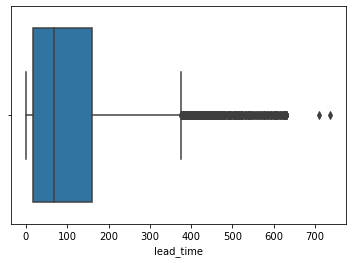

In [15]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['lead_time'])  

number of outlier:  2576 </br>
percentage outlier:  2.50% </br>

### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 2.5% are considered outliers. Using <span style="color:red"><b>**1.5 IQR Rule**</b></span> [LINK](https://blogs.sas.com/content/sgf/2020/07/14/adjusting-outliers-with-the-1-5-iqr-rule/#:~:text=One%20of%20the%20most%20popular%20ways%20to%20adjust,that%20threshold%20are%20suspected%20as%20being%20an%20outlier.), I got approximately 383.5. This result allow me to assume that lead time with more than 383 days are suspected as being an outlier. However, in this case I will drop all the outliers of this feature starting from 365 or 1 year as I will focus on general guests not specific target group of guests (niched market). By that, more than 1 year is considered unusual for me. 

In [16]:
# Following my decision by creating df_temp that contains 'lead_time' value <= 365
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['lead_time'] <= 365]
print('Number of records after dropping lead_time outliers:', len(df_temp)) 

Number of original records: 118898
Number of records after dropping lead_time outliers: 115750


## 2. stays_in_weekend_nights

<AxesSubplot:xlabel='stays_in_weekend_nights'>

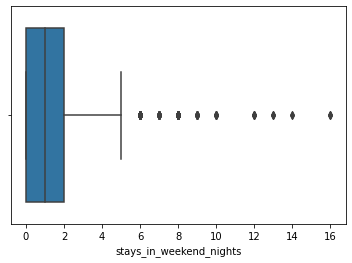

In [17]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['stays_in_weekend_nights']) 

number of outlier:  235 </br>
percentage outlier:  0.23% </br>

### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 0.23% are considered outliers. Using <span style="color:red"><b>**1.5 IQR Rule**</b></span> [LINK](https://blogs.sas.com/content/sgf/2020/07/14/adjusting-outliers-with-the-1-5-iqr-rule/#:~:text=One%20of%20the%20most%20popular%20ways%20to%20adjust,that%20threshold%20are%20suspected%20as%20being%20an%20outlier.), I got approximately 5 weekend nights. This result allow me to assume that weekend nights (Saturday or Sunday) that guest stayed more than 5 nights are suspected as being an outlier. Therefore, I will drop all these data of this feature starting from 5. This is because normally people are not usually going to book for 5 consecutive weekends unless it is a long business trip and my main focus is on general guests not specific target group of guests (niched market). 

In [18]:
# Following my decision by creating df_temp that contains 'stays_in_weekend_nights' value <= 5
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['stays_in_weekend_nights'] < 5]
print('Number of records after dropping stays_in_weekend_nights outliers:', len(df_temp)) 

Number of original records: 115750
Number of records after dropping stays_in_weekend_nights outliers: 115412


## 3. stays_in_week_nights

<AxesSubplot:xlabel='stays_in_week_nights'>

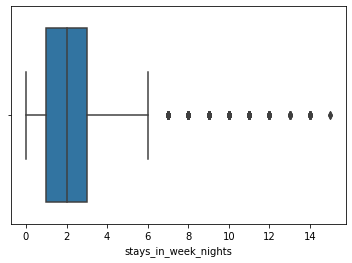

In [19]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['stays_in_week_nights']) 

number of outlier:  3055 </br>
percentage outlier:  2.97% </br>
### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 2.97% are considered outliers. Using <span style="color:red"><b>**1.5 IQR Rule**</b></span> [LINK](https://blogs.sas.com/content/sgf/2020/07/14/adjusting-outliers-with-the-1-5-iqr-rule/#:~:text=One%20of%20the%20most%20popular%20ways%20to%20adjust,that%20threshold%20are%20suspected%20as%20being%20an%20outlier.), I got approximately 6 week nights. This result allow me to assume that week nights guest stayed more than 6 nights are suspected as being an outlier.  </br>
#### This is because according to the Number of nights spent by U.S. travelers in hotels while on business trips 2017 statistics [LINK](https://www.statista.com/statistics/717999/business-travel-number-of-nights-spent-in-hotels-by-us-travelers/), up to 3 and 6 nights are the first 2 highest groups compare to others. This statistic align with my visualization! Therefore, I will drop the data of this feature contained the number starting from 6.

In [20]:
# Following my decision by creating df_temp that contains 'stays_in_week_nights' value < 6
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['stays_in_week_nights'] < 6]
print('Number of records after dropping stays_in_week_nights outliers:', len(df_temp)) 

Number of original records: 115412
Number of records after dropping stays_in_week_nights outliers: 110961


## 4. adults

<AxesSubplot:xlabel='adults'>

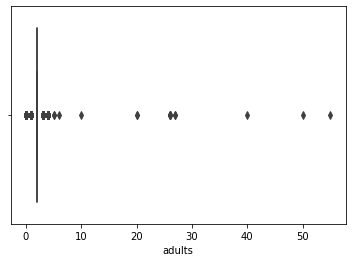

In [21]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['adults']) 

number of outlier:  21822 </br>
percentage outlier:  21.21 </br>
### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, 21.21% are outliers. Using <span style="color:red"><b>**1.5 IQR Rule**</b></span> [LINK](https://blogs.sas.com/content/sgf/2020/07/14/adjusting-outliers-with-the-1-5-iqr-rule/#:~:text=One%20of%20the%20most%20popular%20ways%20to%20adjust,that%20threshold%20are%20suspected%20as%20being%20an%20outlier.), I found that the data that seems to be outliers are piled up and that explain why there are very high percentage of outliers. However, I will drop only the max outliers which value = 26 and keep the rest as I personally think that it is rare that there are 26 guests booking so I would not cosider this particular number as my focus group. 

In [22]:
# Following my decision by creating df_temp that contains 'adults' value < 26
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['adults'] < 26]
print('Number of records after dropping adults outliers:', len(df_temp)) 

Number of original records: 110961
Number of records after dropping adults outliers: 110951


[Go to the cheklist](#adults)

## 5. children

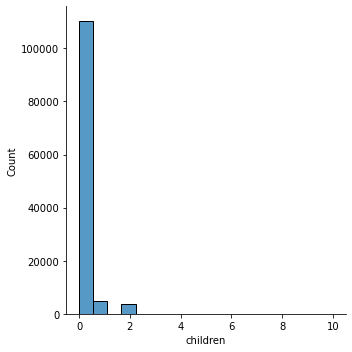

In [23]:
# To show histogram of 'children' and see what is needed to be done
sns.displot(df.children)

<AxesSubplot:xlabel='children'>

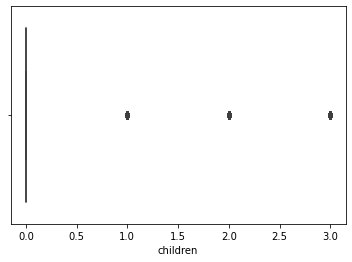

In [24]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['children']) 

number of outlier:  7893</br>
percentage outlier:  7.67%
#### Among all data from this feature, only 7.67% are considered outliers. However in 2021, globally, there was an average of 2.3 children per woman. [SUPPORT LINK](https://ourworldindata.org/fertility-rate#:~:text=Up%20to%201965%20the%20average%20woman%20in%20the,has%20the%20global%20fertility%20rate%20fallen%20so%20rapidly%3F). 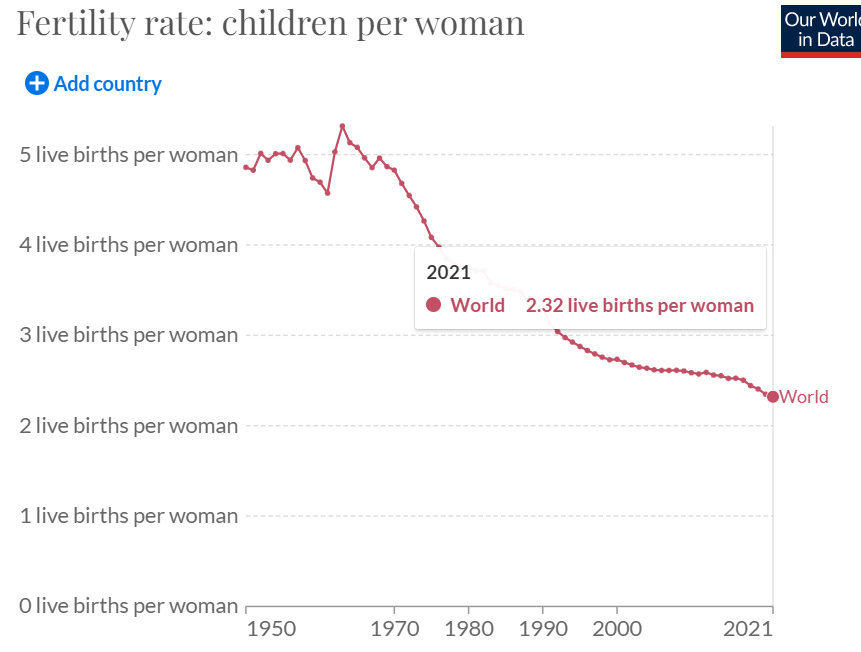 </br>

### <span style="color:Green"><b>**Decision:**</b></span>
#### Therefore, I will drop the children number starting from 3 off.  

In [25]:
# Following my decision by creating df_temp that contains 'children' value < 3
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['children'] < 3]
print('Number of records after dropping children outliers:', len(df_temp)) 

Number of original records: 110951
Number of records after dropping children outliers: 110877


[Go to the cheklist](#children)

## 6. babies

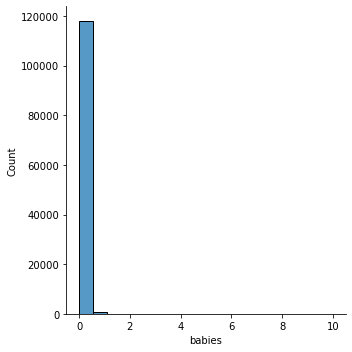

In [26]:
# To show histogram of 'children' and see what is needed to be done
sns.displot(df.babies)

<AxesSubplot:xlabel='babies'>

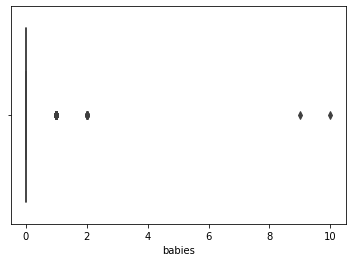

In [27]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['babies']) 

number of outlier:  764</br>
percentage outlier:  0.74

### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 0.74% are considered outliers. So, I will drop only the ones with 9 and 10 babies and keep the rest. This is because it is unusual that a family will have 9 or 10 babies therefore, there are unlikely that there will be a family with that amount of baby booking for a hotel.

In [28]:
# Following my decision by creating df_temp that contains 'babies' value < 9
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['babies'] < 9]
print('Number of records after dropping babies outliers:', len(df_temp)) 

Number of original records: 110877
Number of records after dropping babies outliers: 110875


[Go to the cheklist](#babies)

## 7. is_repeated_guest ==> a binary so I will keep this feature first

## 8. previous_cancellations

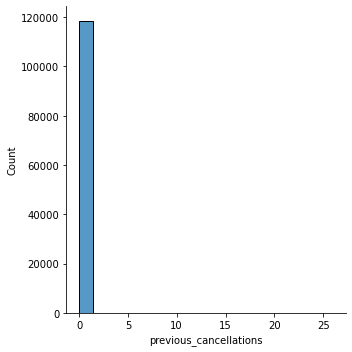

In [29]:
# To show histogram of 'children' and see what is needed to be done
sns.displot(df.previous_cancellations)

<AxesSubplot:xlabel='previous_cancellations'>

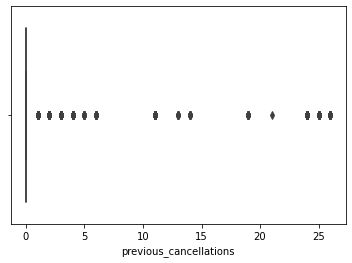

In [30]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['previous_cancellations']) 

number of outlier:  5555 </br>
percentage outlier:  5.40

### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 5.4% are considered outliers. However, due to the fact that the feature is previous cancellations, I will keep all the data and will convert the data in to binary later on(making number apart from 0 ==> 1)

[Go to the cheklist](#previous_cancellations)

## 9. previous_bookings_not_canceled

<AxesSubplot:xlabel='previous_bookings_not_canceled'>

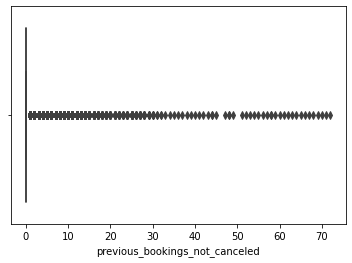

In [31]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['previous_bookings_not_canceled']) 

number of outlier:  985 </br>
percentage outlier:  0.96
### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 0.96% are considered outliers. However, due to the fact that the feature is previous_bookings_not_canceled, I will keep all the data and will convert the data in to binary later on (making number apart from 0 ==> 1) 

### <span style="color:red"><b>**NOTE:**</b></span>
> I quite confidence that this previous_bookings_not_canceled will have a strong correlation with the previous feature which is 'previous_cancellations' feature. Therefore, I will look into correlation and then drop one column out. 

[Go to the cheklist](#previous_bookings_not_canceled)

## 10. booking_changes
[Link Reference for visualizations](https://www.kaggle.com/code/sanjana08/hotel-booking-cancellation-prediction/notebook)

<AxesSubplot:xlabel='booking_changes', ylabel='is_canceled'>

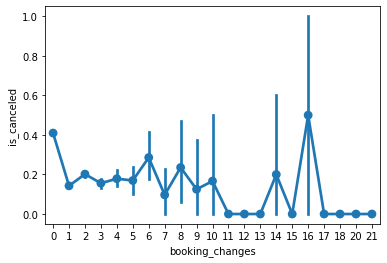

In [32]:
# I want to see pattern to understand it therefore,I decided to use the point plot instead references from Dr.G kaggle
sns.pointplot(data=df, x='booking_changes', y='is_canceled')

### NOTE:
#### Seems like there are no relation as I expected it to be. However, I will keep it in my model as I want to check its correlation first as it may help explaining my target variable 

<AxesSubplot:xlabel='booking_changes'>

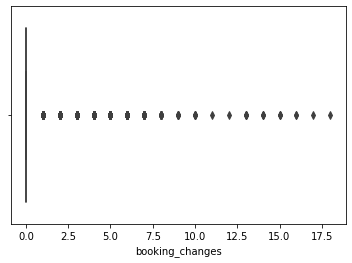

In [33]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['booking_changes']) 

number of outlier:  14249 <br>
percentage outlier:  13.84
### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 13.84% are considered outliers. However, I will keep all the data as I believe the more changes made, the less chance the guests will be canceled their booking.

[Go to the cheklist](#booking_changes)

## 11. days_in_waiting_list

<AxesSubplot:xlabel='days_in_waiting_list'>

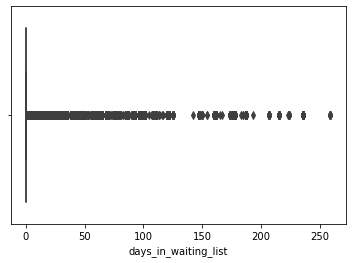

In [34]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['days_in_waiting_list']) 

number of outlier:  3539 </br>
percentage outlier:  3.4

### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 3.4% are considered outliers. However, according to this [REFERENCE LINK](https://www.siteminder.com/r/hotel-distribution/hotel-revenue-management/hotel-guests-book-advance/#:~:text=It%20reveals%20the%20time%20between%20booking%20and%20check-in,findings%3A%20Global%20average%20lead%20time%20is%2024%20days), Global average waiting list time is 24 days or around 1 month early. Therefore, I will convert all data with more than 24 to 24 days.  

In [35]:
# Replacing range >=24 days with 24 using np.where

df_temp['days_in_waiting_list'] = np.where(df_temp['days_in_waiting_list'] > 24, 24, df_temp['days_in_waiting_list'])

<AxesSubplot:xlabel='days_in_waiting_list'>

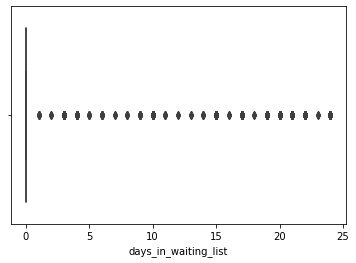

In [36]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['days_in_waiting_list']) 

[Go to the cheklist](#days_in_waiting_list)

## 12. adr = average daily rate ==> how much revenue is made per room on average?
<img src="https://www.siteminder.com/wp-content/uploads/2022/07/ADR-Formula-2.png"/>

<AxesSubplot:xlabel='adr'>

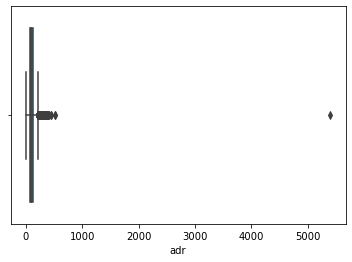

In [37]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['adr']) 

In [38]:
# To check how many data each group has 
df_temp.groupby(['adr'])['adr'].count()

adr
0.00       1864
1.00         15
1.29          1
1.48          1
1.56          1
           ... 
437.00        1
451.50        1
508.00        1
510.00        1
5400.00       1
Name: adr, Length: 8051, dtype: int64

number of outlier:  3514
percentage outlier:  3.42

### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 3.42% are considered outliers. However, according to the ADR in 2021 from the largest hotel chain in the world which is Marriott, [LINK](https://www.statista.com/statistics/271127/average-daily-rate-marriott-international-inc-hotels-worldwide/) ADR= 145.56  or 146 US dollars. Therefore, I will hold on to this and apply to my data as well by dropping that data which has adr more than 146 US dollars.  

In [39]:
# Following my decision by creating df_temp that contains 'adr' value < 146
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['adr'] < 146]
print('Number of records after dropping adr outliers:', len(df_temp)) 

Number of original records: 110875
Number of records after dropping adr outliers: 93639


## 13. required_car_parking_spaces

<AxesSubplot:xlabel='required_car_parking_spaces'>

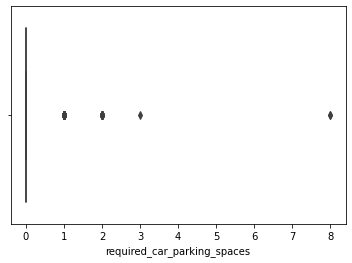

In [40]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['required_car_parking_spaces']) 

In [41]:
# To check how many data each group has 
df_temp.groupby(['required_car_parking_spaces'])['required_car_parking_spaces'].count()

required_car_parking_spaces
0    88504
1     5114
2       18
3        1
8        2
Name: required_car_parking_spaces, dtype: int64

number of outlier:  5431 </b>

percentage outlier:  5.28
### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 5.28% are considered outliers. Therefore,  I will keep all data as it is possible to have more than 1 car such as travelling with friends,  business group trip. 

[Go to the cheklist](#required_car_parking_spaces)

## 14. total_of_special_requests

<AxesSubplot:xlabel='total_of_special_requests'>

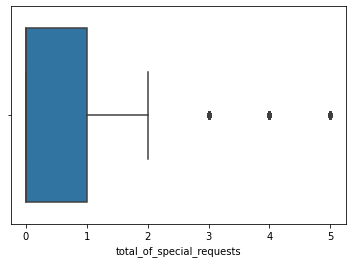

In [42]:
# Using this instead of histogram to see the outliers clearer 
sns.boxplot(df_temp['total_of_special_requests']) 

In [43]:
df_temp.groupby(['total_of_special_requests'])['total_of_special_requests'].count()

total_of_special_requests
0    57392
1    25242
2     9123
3     1656
4      199
5       27
Name: total_of_special_requests, dtype: int64

number of outlier:  2533 </b>

percentage outlier:  2.46

### <span style="color:Green"><b>**Decision:**</b></span>
#### Among all data from this feature, only 2.46% are considered outliers. Therefore,  I will drop all outliers which is 3,4,5 from this feature as it is seems rarely to occur and not going to effect my model if I drop them out.

In [44]:
# Following my decision by creating df_temp that contains 'total_of_special_requests' value < 3
print('Number of original records:', len(df_temp))
df_temp = df_temp[df_temp['total_of_special_requests'] < 3]
print('Number of records after dropping total_of_special_requests outliers:', len(df_temp)) 

Number of original records: 93639
Number of records after dropping total_of_special_requests outliers: 91757


### Questions that I have after preparing numerical data:
>- Can I hold on to 1.5IQR rule? If so, is it too easy to cut all values that exceed from the value I get from the rule?
>- Should I check only feature alone? Can I check each feature with target variable already or wait and find correlation later after cleaning all data?
>- What is an actual indicator whether which predictor variables (X) I should keep or drop? 

[Go to Data Prep Outline](#data-prep)

### **4.4 Feature Selection for Numerical variables**  <a class="anchor" id="feature-selection1"></a> <br>

>**To Do:**<br>
>- [X] Evaluate correlation coefficients of numerical vars <a class="anchor" id="ecn"></a> [Procedure](#numer) <br>


>**Evaluate correlation coefficients of numerical vars**<br>  <a class="anchor" id="numer"></a> 
><h3>Quick look at correlations</h3>
Now that I've cleaned up our numerical variables, let's take a quick look at the correlation matrix of all numerical variables to see if I can spot the most promising feature to move forward with. I will distinguish the way to check it into 2 forms of options. I will construct them by convert them to <br>
=> Option1: table form <br>
=> Option2: Horizontal barchart visualization

### <span style="color:red"><b></b>**DON'T FORGET** to check for multicollinearity between predictor variables!!! (>0.7)</span><br>

In [45]:
# Option 1: tableform
# Find correlation coeff each numerical varriable has with 'is_canceled' by using .corr() 
correlations = df_temp.select_dtypes(include=numerics).corr() 
correlations

is_canceled  lead_time  arrival_date_year  \
is_canceled                            1.00       0.31               0.00   
lead_time                              0.31       1.00              -0.01   
arrival_date_year                      0.00      -0.01               1.00   
arrival_date_week_number               0.01       0.14              -0.58   
arrival_date_day_of_month             -0.01       0.00               0.01   
stays_in_weekend_nights               -0.00       0.10               0.03   
stays_in_week_nights                   0.03       0.23               0.05   
adults                                 0.08       0.17              -0.00   
children                              -0.01      -0.02               0.03   
babies                                -0.03      -0.02              -0.01   
is_repeated_guest                     -0.09      -0.14               0.02   
previous_cancellations                 0.12       0.11              -0.12   
previous_bookings_not_canceled        -0.06      -0.08               0.04   
booking_changes                       -0.15       0.01               0.03   
days_in_waiting_list                   0.11       0.17              -0.08   
adr                                    0.11       0.06               0.18   
required_car_parking_spaces           -0.18      -0.12              -0.01   
total_of_special_requests             -0.23      -0.09               0.10   
row_num                               -0.23       0.02               0.29   

                                arrival_date_week_number  \
is_canceled                                         0.01   
lead_time                                           0.14   
arrival_date_year                                  -0.58   
arrival_date_week_number                            1.00   
arrival_date_day_of_month                           0.05   
stays_in_weekend_nights                             0.02   
stays_in_week_nights                                0.02   
adults                                              0.02   
children                                           -0.01   
babies                                              0.01   
is_repeated_guest                                  -0.03   
previous_cancellations                              0.04   
previous_bookings_not_canceled                     -0.02   
booking_changes                                    -0.00   
days_in_waiting_list                               -0.00   
adr                                                 0.04   
required_car_parking_spaces                        -0.01   
total_of_special_requests                           0.01   
row_num                                            -0.04   

                                arrival_date_day_of_month  \
is_canceled                                         -0.01   
lead_time                                            0.00   
arrival_date_year                                    0.01   
arrival_date_week_number                             0.05   
arrival_date_day_of_month                            1.00   
stays_in_weekend_nights                             -0.00   
stays_in_week_nights                                -0.01   
adults                                              -0.00   
children                                             0.02   
babies                                              -0.00   
is_repeated_guest                                   -0.01   
previous_cancellations                              -0.03   
previous_bookings_not_canceled                       0.00   
booking_changes                                      0.01   
days_in_waiting_list                                 0.03   
adr                                                  0.01   
required_car_parking_spaces                          0.01   
total_of_special_requests                            0.00   
row_num                                              0.01   

                                stays_in_weekend_nights  stays_in_wee

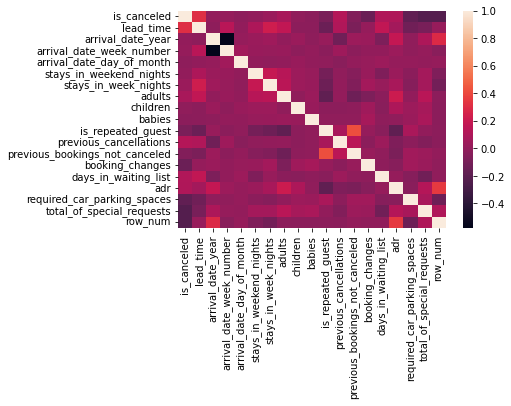

In [46]:
# option1.1: by heatmap
sns.heatmap(correlations)
plt.show()

In [47]:
# Help to check all numeric features' column names which I will use them to find a correlation value to help determine 
# what features I should drop 
df_temp.columns.values

array(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'row_num'], dtype=object)

In [48]:
# Option1.2: ranking table+ abs
# help check the correlation by ranking them 
x = df_temp[['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]

x = x.corr()[['is_canceled']]
x['abs'] = x['is_canceled'].abs()
x.sort_values(by = ['abs'] , ascending = False)

is_canceled  abs
is_canceled                            1.00 1.00
lead_time                              0.31 0.31
total_of_special_requests             -0.23 0.23
required_car_parking_spaces           -0.18 0.18
booking_changes                       -0.15 0.15
previous_cancellations                 0.12 0.12
days_in_waiting_list                   0.11 0.11
adr                                    0.11 0.11
is_repeated_guest                     -0.09 0.09
adults                                 0.08 0.08
previous_bookings_not_canceled        -0.06 0.06
stays_in_week_nights                   0.03 0.03
babies                                -0.03 0.03
arrival_date_day_of_month             -0.01 0.01
arrival_date_week_number               0.01 0.01
children                              -0.01 0.01
arrival_date_year                      0.00 0.00
stays_in_weekend_nights               -0.00 0.00

<AxesSubplot:xlabel='is_canceled'>

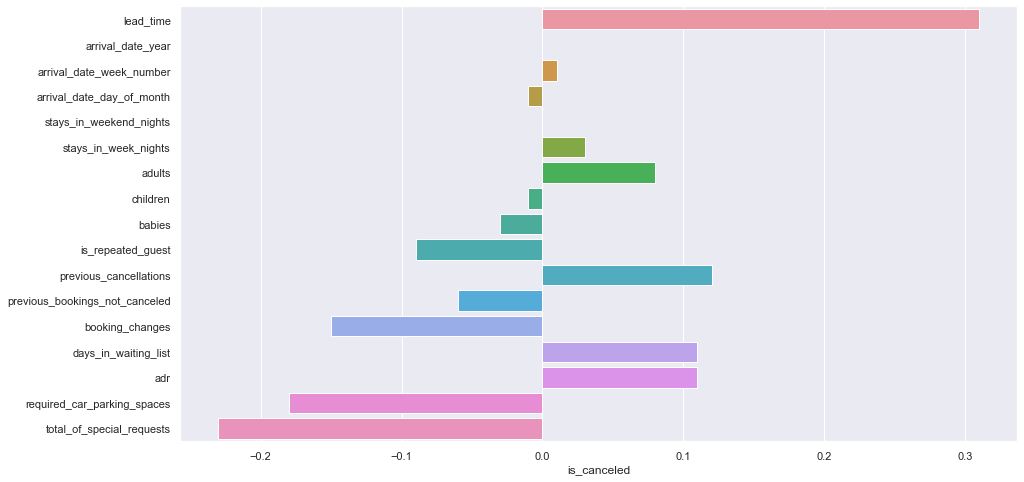

In [49]:
# Option 2: Horizontal barchart visualization
# Lets grab the correlations between our target variable and the remaining numerical features
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier and way more cuter viewing! 

x = df_temp[['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]

a = x.corr()[['is_canceled']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.is_canceled[1:],y=a.index[1:],data=a, orient='h')

## <span style="color:red"><b></b>**Important NOTICE:**</span><br> 

> ### According to the heat map + correlation table, turns out there are no multicollinearity occurs!!
 ## <span style="color:red"><b> **Final Set of Numerical Vars:**<br>
> **First 10th highly correlated features:**<br>
>- Lead_time (+)
>- total_of_special_requests (-)	
>- required_car_parking_spaces (-)
>- booking_changes (-)
>- previous_cancellations (+)
>- days_in_waiting_list	(+)
>- adr (+)	
>- is_repeated_guest (-) 
>- adults (+)	
>- previous_bookings_not_canceled (-)
<br>

## <span style="color:red"><b></b>**3rd Decision:**</span><br> 
> **Dropped features with which is not in the first 10th rank:**<br>
>> This is because I feel it is too little to take into account
>- stays_in_weekend_nights	
>- babies	
>- arrival_date_day_of_month	
>- arrival_date_week_number	
>- children	
>- arrival_date_year	
>- stays_in_week_nights	

<span style="color:green"><b></b> -There's more that I can play with barplot!! [LINK](https://indianaiproduction.com/seaborn-barplot/) <br>

In [50]:
# Let's drop these features out!
df_temp = df_temp.drop(['stays_in_weekend_nights'], axis=1)
df_temp = df_temp.drop(['babies'], axis=1)
df_temp = df_temp.drop(['arrival_date_day_of_month'], axis=1)
df_temp = df_temp.drop(['arrival_date_week_number'], axis=1)
df_temp = df_temp.drop(['arrival_date_year'], axis=1)
df_temp = df_temp.drop(['children'], axis=1)
df_temp = df_temp.drop(['stays_in_week_nights'], axis=1)

[Go to Data Prep Outline](#data-prep)


# Categorical Variables
Let's take a close look at our list of categorical variables and get these cleaned up and ready for modeling


><h3>4.5 Outlier Detection & Treatment for Categorical features </h3>  <a class="anchor" id="outliers2"></a>

To do list:<br>
>- [X] Evaluate categorical variables vs target variable <a class="anchor" id="ect"></a> [Procedure](#cat)

In [51]:
# display only columns
object_columns = df.select_dtypes(include=['object']).columns
print('\nobject columns:\n', object_columns)


object columns:
 Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')


In [52]:
# Create temp dataframe with target and categorical variables only
# Matching numerical variable column (is_canceled) with other categorical variables columns 
# ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment','distribution_channel', 'reserved_room_type', 
# 'assigned_room_type', 'deposit_type', 'customer_type']
categorical = ['object']

# Create df_temp which is the df represent all target + cat var
xx = pd.merge(df[['row_num']],df.select_dtypes(include=categorical), left_index=True, right_index=True)
df_cat = pd.merge(df_temp[['is_canceled','row_num']],xx, on ='row_num',how = 'left')
df_cat.head()

is_canceled  row_num         hotel arrival_date_month meal country  \
0            0        0  Resort Hotel               July   BB     PRT   
1            0        2  Resort Hotel               July   BB     GBR   
2            0        3  Resort Hotel               July   BB     GBR   
3            0        4  Resort Hotel               July   BB     GBR   
4            0        5  Resort Hotel               July   BB     GBR   

  market_segment distribution_channel reserved_room_type assigned_room_type  \
0         Direct               Direct                  C                  C   
1         Direct               Direct                  A                  C   
2      Corporate            Corporate                  A                  A   
3      Online TA                TA/TO                  A                  A   
4      Online TA                TA/TO                  A                  A   

  deposit_type customer_type  
0   No Deposit     Transient  
1   No Deposit     Transient  
2   No Deposit     Transient  
3   No Deposit     Transient  
4   No Deposit     Transient

##### categorized data by group into others for the things that not relevant/ keep only the relevant thing seperate unique

In [53]:
# Finding the quantity of all unique words 
# row num= ID to match with numerical variables later on after do the feature selection by decition tree!
df_cat.nunique()

is_canceled                 2
row_num                 91757
hotel                       2
arrival_date_month         12
meal                        5
country                   170
market_segment              7
distribution_channel        5
reserved_room_type         10
assigned_room_type         12
deposit_type                3
customer_type               4
dtype: int64

## <span style="color:red"><b></b>**4th Decision:**</span><br> 
[Link Reference for visualizations](https://www.kaggle.com/code/sanjana08/hotel-booking-cancellation-prediction/notebook)

### 1. hotel feature:

Percentage cancelations in resort hotel=  27.975047984644913
Percentage cancelations in city hotel=  41.70891024186023


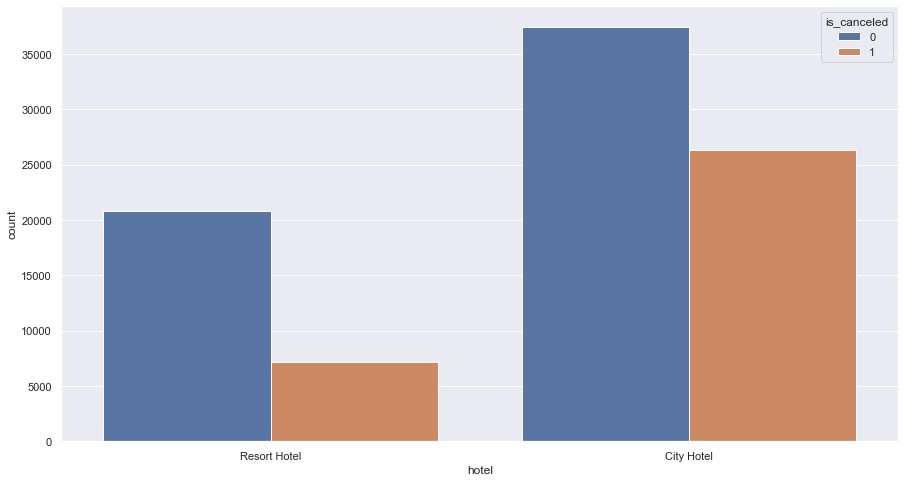

In [54]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with hotel column
sns.countplot(data=df_cat, x='hotel', hue='is_canceled')
resort_canceled = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==1)]
city_canceled = df[(df['hotel']=='City Hotel') & (df['is_canceled']==1)]
print('Percentage cancelations in resort hotel= ', ((len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel']))*100))
print('Percentage cancelations in city hotel= ', ((len(city_canceled))/(len(df[df['hotel']=='City Hotel']))*100))

### NOTE:
#### My hypothesis is valid!

### 2.arrival_date_month

In [55]:
month_lists = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df_cat.arrival_date_month = df.arrival_date_month.map(month_lists).astype(int)

<AxesSubplot:xlabel='arrival_date_month', ylabel='count'>

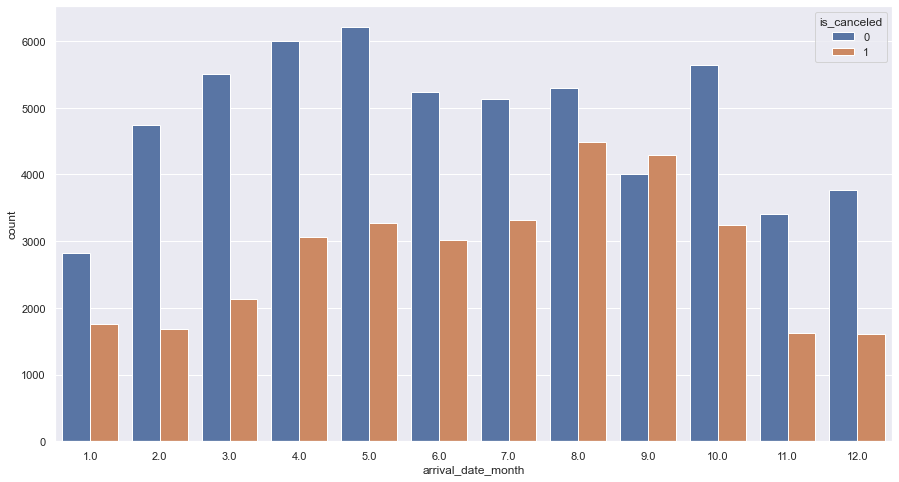

In [56]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with arrival_date_month column
sns.countplot(data=df_cat, x='arrival_date_month', hue='is_canceled')

### NOTE:
#### seems like it opposed to my hypothesis. Trend seems to peak at second and third quater and have the same fluctuation between cancled and not canceled.

### 3. meal

In [57]:
df_cat.shape

(91757, 12)

<AxesSubplot:xlabel='meal', ylabel='count'>

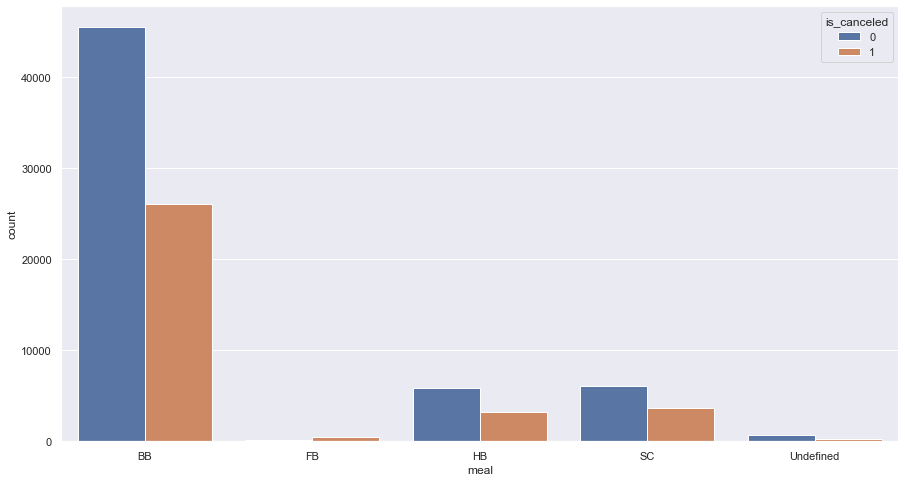

In [58]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with meal column
sns.countplot(data=df_cat, x='meal', hue='is_canceled')

### NOTE:
#### Not aligned with my hypothesis. However, looks like there are a small portion of other meals apart from Bed&Breakfast type. Therefore, I will use Dr. G  snippets to help seperate BB and other by converting others into 'other_meal' instead!

In [59]:
# categorized other than BB to = other_meals instead
keep = df_cat['meal'].value_counts().index[:1]
df_cat['meal'] = np.where(df_cat['meal'].isin(keep), df_cat['meal'], 'other_meals')
# checking the result and it is already changed!
df_cat.tail()

is_canceled  row_num       hotel  arrival_date_month meal country  \
91752            0   118889  City Hotel                6.00   BB     DEU   
91753            0   118891  City Hotel                6.00   BB     DEU   
91754            0   118892  City Hotel                6.00   BB     BEL   
91755            0   118893  City Hotel                6.00   BB     BEL   
91756            0   118896  City Hotel                6.00   BB     GBR   

      market_segment distribution_channel reserved_room_type  \
91752         Direct               Direct                  A   
91753  Offline TA/TO                TA/TO                  A   
91754  Offline TA/TO                TA/TO                  A   
91755  Offline TA/TO                TA/TO                  A   
91756      Online TA                TA/TO                  A   

      assigned_room_type deposit_type customer_type  
91752                  A   No Deposit     Transient  
91753                  A   No Deposit     Transient  
91754                  A   No Deposit     Transient  
91755                  A   No Deposit     Transient  
91756                  A   No Deposit     Transient

<AxesSubplot:xlabel='meal'>

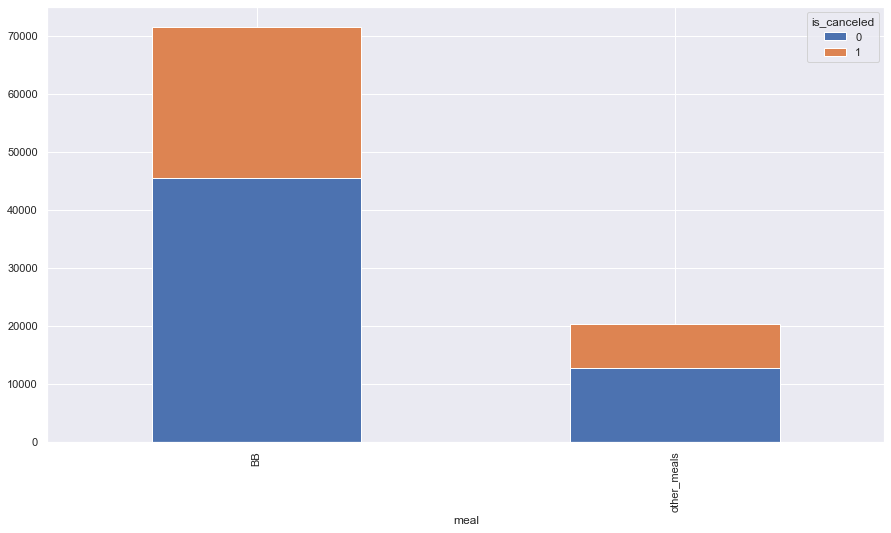

In [60]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with meal column
df_cat.groupby(['meal', 'is_canceled']).size().unstack().plot(kind='bar', stacked=True)

### 4. country

<AxesSubplot:xlabel='count', ylabel='country'>

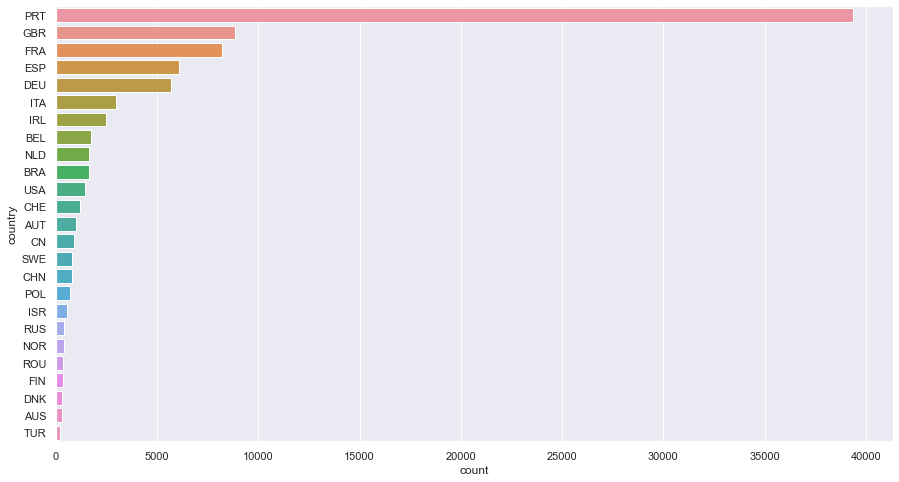

In [61]:
# Using .countplot to see how many each model have
sns.countplot(y="country", data=df_cat,
              order=df_cat.country.value_counts().iloc[:25].index)

### NOTE:
> The fact that there are 174 countries in total which I consider a lotttt. Therefore, I will use Dr.G code snippets to help categorized the first 5 rank and convert others into 'others' instead!

In [62]:
## Incase I want to sort feature count ranking
## sort_column = df.groupby(['country']).size().reset_index(name='count')
## sort_column.sort_values(by = ['count'] , ascending = False)

# categorized other than first 5 countries to = other_countries instead
keep = df_cat['country'].value_counts().index[:5]
df_cat['country'] = np.where(df_cat['country'].isin(keep), df_cat['country'], 'other_countries')
# checking the result and it is already changed!
df_cat.tail()

is_canceled  row_num       hotel  arrival_date_month meal  \
91752            0   118889  City Hotel                6.00   BB   
91753            0   118891  City Hotel                6.00   BB   
91754            0   118892  City Hotel                6.00   BB   
91755            0   118893  City Hotel                6.00   BB   
91756            0   118896  City Hotel                6.00   BB   

               country market_segment distribution_channel reserved_room_type  \
91752              DEU         Direct               Direct                  A   
91753              DEU  Offline TA/TO                TA/TO                  A   
91754  other_countries  Offline TA/TO                TA/TO                  A   
91755  other_countries  Offline TA/TO                TA/TO                  A   
91756              GBR      Online TA                TA/TO                  A   

      assigned_room_type deposit_type customer_type  
91752                  A   No Deposit     Transient  
91753                  A   No Deposit     Transient  
91754                  A   No Deposit     Transient  
91755                  A   No Deposit     Transient  
91756                  A   No Deposit     Transient

<AxesSubplot:xlabel='country', ylabel='count'>

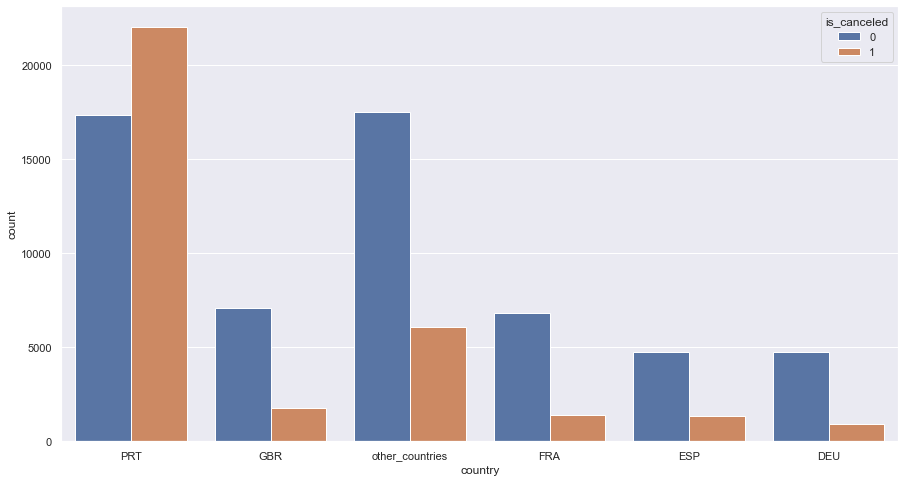

In [63]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with hotel column
sns.countplot(data=df_cat, x='country', hue='is_canceled')

### 5. market_segment            

<AxesSubplot:xlabel='market_segment', ylabel='count'>

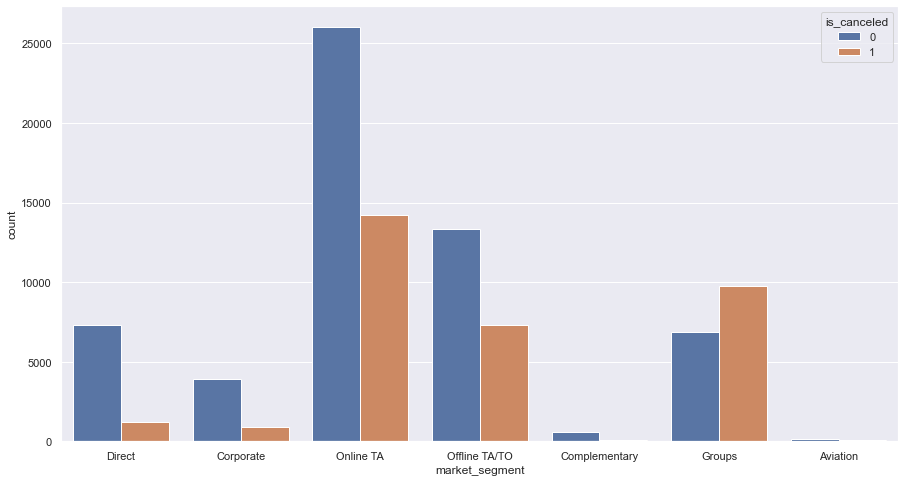

In [64]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with hotel column
sns.countplot(data=df_cat, x='market_segment', hue='is_canceled')

### NOTE:
> I feel like apart from top 4 ranks, there are too little amount in each group. Therefore, I will use Dr.G code snippets to help categorized the first 4 rank and convert others into 'other_market_segment' instead!
### Question from curiosity:
#### Are there an actual ways to actually know which proportion to use as a baseline to cut off and know which grop to combine as others?

In [65]:
# categorized other than first 4 marget_segment ranks to = other_market_segment instead
keep = df_cat['market_segment'].value_counts().index[:4]
df_cat['market_segment'] = np.where(df_cat['market_segment'].isin(keep), df_cat['market_segment'], 'other_market_segment')

## 6. distribution_channel      

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

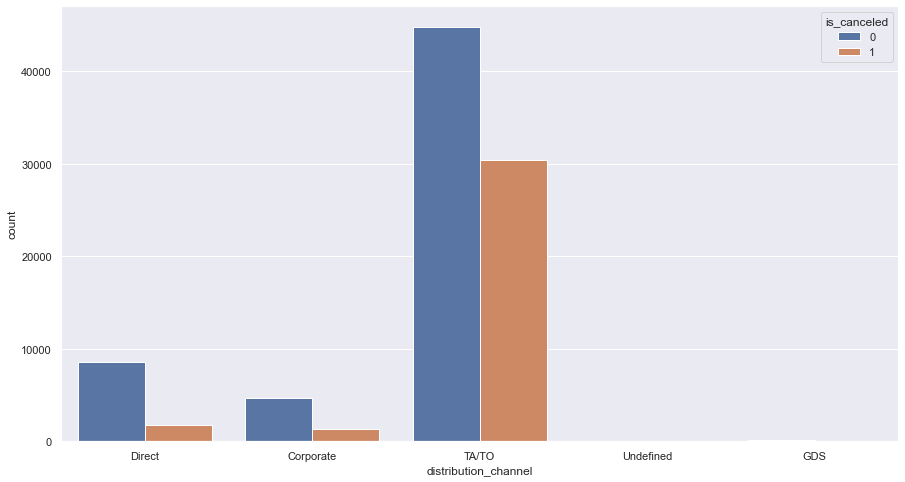

In [66]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with distribution_channel column
sns.countplot(data=df_cat, x='distribution_channel', hue='is_canceled')

### NOTE:
> I feel like apart from TA/TO ranks, there are too little amount in each group. Therefore, I will use Dr.G code snippets to help convert others into 'other_distribution_channel' instead!

In [67]:
# categorized other than first rank to = other_countries instead
keep = df_cat['distribution_channel'].value_counts().index[:1]
df_cat['distribution_channel'] = np.where(df_cat['distribution_channel'].isin(keep), df_cat['distribution_channel'], 'other_distribution_channel')

## 7. reserved_room_type        

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

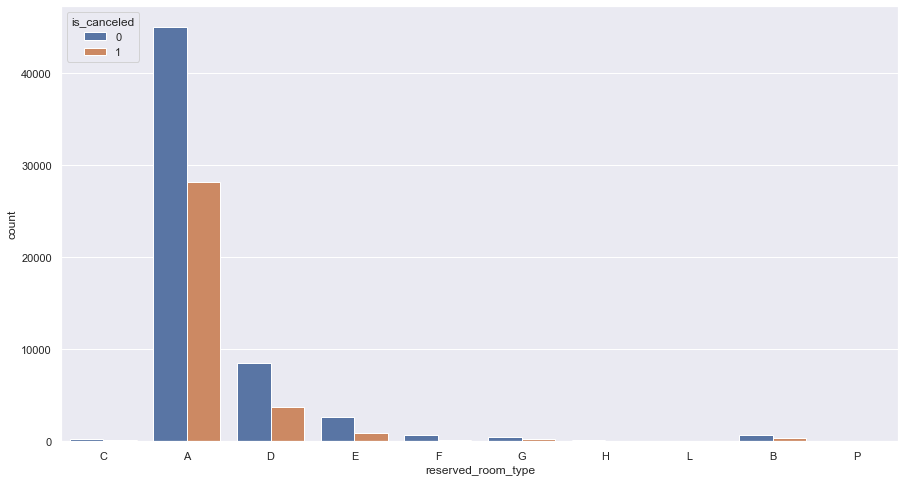

In [68]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with reserved_room_type column
sns.countplot(data=df_cat, x='reserved_room_type', hue='is_canceled')

## 8. assigned_room_type       

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

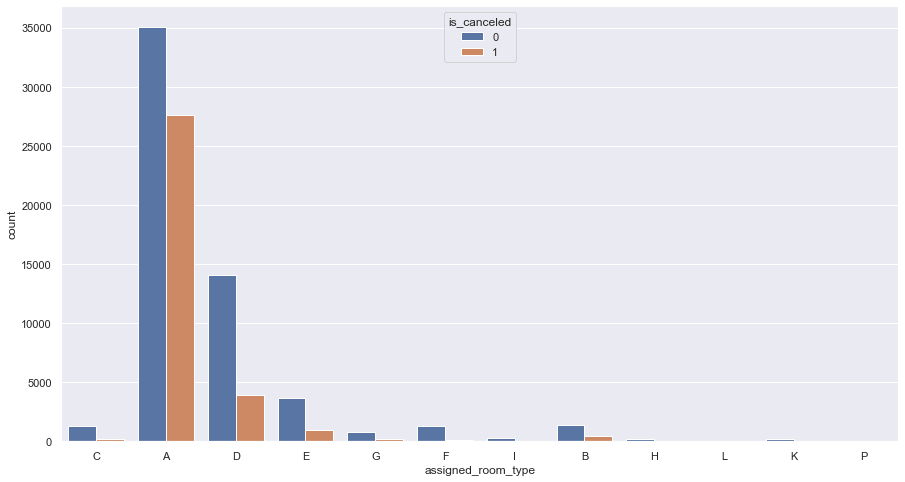

In [69]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with assigned_room_type column
sns.countplot(data=df_cat, x='assigned_room_type', hue='is_canceled')

## 7+8 = 9. meet_expectation_room
### NOTE1: 
#### Aligned with my assumption!. As these 2features corresponse each other as seeing in the countplot. They both have the same trend and approximately same proportion of canceled rate which can be explained that if guests get the room that is not what they ask for, they likely to cancel the reservation. Therefore, I decided to create another column which comes from combining these 2 features by if they have the same code, I will assign number 1 and if not I will assign number 0 to that paired cells. 
### NOTE2:
#### I will drop features 7 and 8 later on

In [70]:
df_cat['meet_expectation_room'] = np.where(df_cat['reserved_room_type'] == df_cat['assigned_room_type'], 1, 0)
df_cat.head()

is_canceled  row_num         hotel  arrival_date_month meal country  \
0            0        0  Resort Hotel                7.00   BB     PRT   
1            0        2  Resort Hotel                7.00   BB     GBR   
2            0        3  Resort Hotel                7.00   BB     GBR   
3            0        4  Resort Hotel                7.00   BB     GBR   
4            0        5  Resort Hotel                7.00   BB     GBR   

         market_segment        distribution_channel reserved_room_type  \
0                Direct  other_distribution_channel                  C   
1                Direct  other_distribution_channel                  A   
2  other_market_segment  other_distribution_channel                  A   
3             Online TA                       TA/TO                  A   
4             Online TA                       TA/TO                  A   

  assigned_room_type deposit_type customer_type  meet_expectation_room  
0                  C   No Deposit     Transient                      1  
1                  C   No Deposit     Transient                      0  
2                  A   No Deposit     Transient                      1  
3                  A   No Deposit     Transient                      1  
4                  A   No Deposit     Transient                      1

## 10. deposit_type              

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

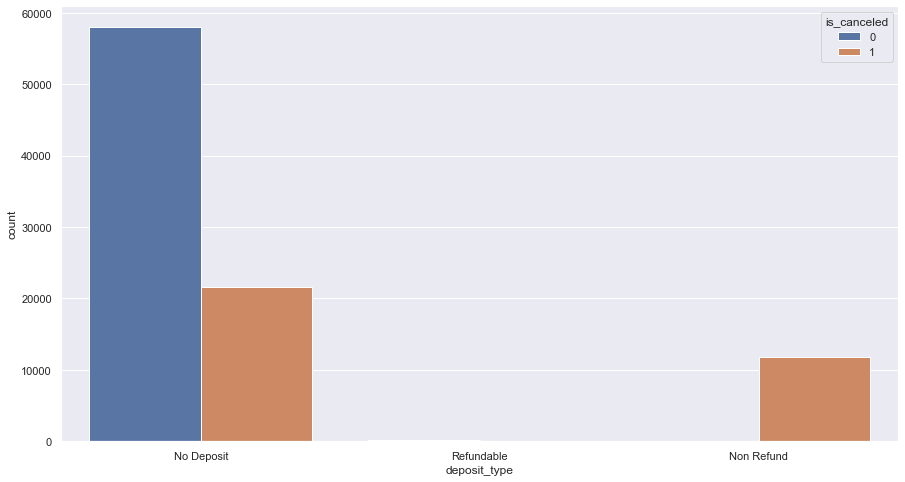

In [71]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with deposit_type column
sns.countplot(data=df_cat, x='deposit_type', hue='is_canceled')

### NOTE:
> Since there is toooo little data on refundable type. Therefore, I will use Dr.G code snippets to help convert Refundable+Nonrefund into 'deposit' instead!

In [72]:
# categorized other than first rank to = deposit instead
keep = df_cat['deposit_type'].value_counts().index[:1]
df_cat['deposit_type'] = np.where(df_cat['deposit_type'].isin(keep), df_cat['deposit_type'], 'deposit')

## 11. customer_type             

<AxesSubplot:xlabel='customer_type', ylabel='count'>

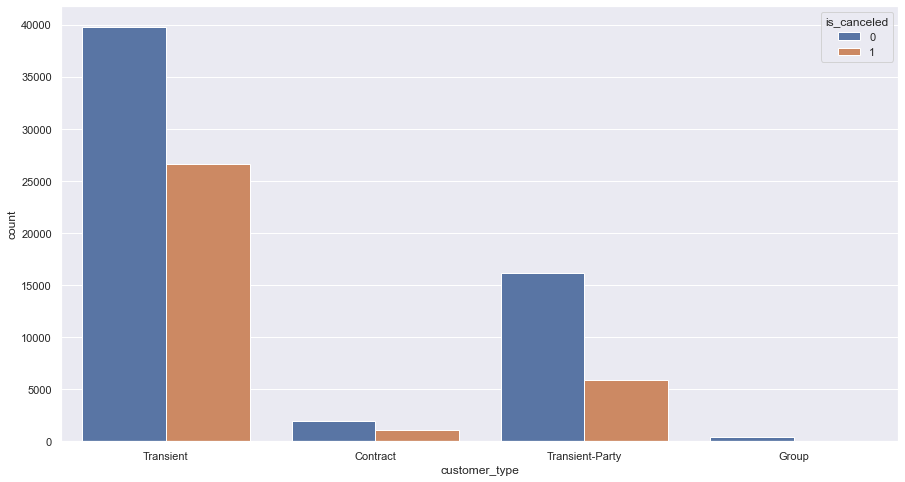

In [73]:
# see the corresponse is_canceled using .boxplot by comparing is_canceled with customer_type column
sns.countplot(data=df_cat, x='customer_type', hue='is_canceled')

### NOTE:
> Since there is toooo little data on Contract and Group type. Therefore, I will use Dr.G code snippets to help convert these 2 groups into 'others' instead!

In [74]:
# categorized other than first 2 ranks to = others instead
keep = df_cat['customer_type'].value_counts().index[:2]
df_cat['customer_type'] = np.where(df_cat['customer_type'].isin(keep), df_cat['customer_type'], 'others')

## <span style="color:red"><b></b>**Drop those categorical variable mentioned :**</span><br> 

In [75]:
df_cat.drop(['reserved_room_type','assigned_room_type'], axis=1, inplace=True)

[Go to Data Prep Outline](#data-prep)

### **4.6 Feature Selection for Categorical variables**  <a class="anchor" id="feature-selection2"></a> <br>

>**To Do:**<br>
>- [X] **Feature Transformations:** Encode categorical variables (Convert into dummy form) <a class="anchor" id="ecn"></a> [Procedure](#Featuret) <br>
>- [X] Evaluate correlation coefficients of numerical vars <a class="anchor" id="ecn"></a> [Procedure](#numer) <br>


> **Feature Transformations** <br> <a class="anchor" id="Featuret"></a>

In [76]:
cat_vars=['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment','distribution_channel', 'deposit_type',
          'customer_type']


# Convert every relate columns into Dummy variables and named this df ==> 'df_encode' 
df_encode = pd.get_dummies(df_cat,columns=cat_vars, prefix_sep='_', drop_first=True)
df_encode.head()

is_canceled  row_num  meet_expectation_room  hotel_Resort Hotel  \
0            0        0                      1                   1   
1            0        2                      0                   1   
2            0        3                      1                   1   
3            0        4                      1                   1   
4            0        5                      1                   1   

   arrival_date_month_2.0  arrival_date_month_3.0  arrival_date_month_4.0  \
0                       0                       0                       0   
1                       0                       0                       0   
2                       0                       0                       0   
3                       0                       0                       0   
4                       0                       0                       0   

   arrival_date_month_5.0  arrival_date_month_6.0  arrival_date_month_7.0  \
0                       0                       0                       1   
1                       0                       0                       1   
2                       0                       0                       1   
3                       0                       0                       1   
4                       0                       0                       1   

   arrival_date_month_8.0  arrival_date_month_9.0  arrival_date_month_10.0  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       0                        0   

   arrival_date_month_11.0  arrival_date_month_12.0  meal_other_meals  \
0                        0                        0                 0   
1                        0                        0                 0   
2                        0                        0                 0   
3                        0                        0                 0   
4                        0                        0                 0   

   country_ESP  country_FRA  country_GBR  country_PRT  \
0            0            0            0            1   
1            0            0            1            0   
2            0            0            1            0   
3            0            0            1            0   
4            0            0            1            0   

   country_other_countries  market_segment_Groups  \
0                        0                      0   
1                        0                      0   
2                        0                      0   
3                        0                      0   
4                        0                      0   

   market_segment_Offline TA/TO  market_segment_Online TA  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         1   
4                             0                         1   

   market_segment_other_market_segment  \
0                                    0   
1                                    0   
2                                    1   
3                                    0   
4                                    0   

   distribution_channel_other_distribution_channel  deposit_type_deposit  \
0                                                1                     0   
1                                                1                     0   
2                                                1                     0   
3                                                0                     0   
4                                                0                     0   

   custom

In [77]:
df_encode.columns.values

array(['is_canceled', 'row_num', 'meet_expectation_room',
       'hotel_Resort Hotel', 'arrival_date_month_2.0',
       'arrival_date_month_3.0', 'arrival_date_month_4.0',
       'arrival_date_month_5.0', 'arrival_date_month_6.0',
       'arrival_date_month_7.0', 'arrival_date_month_8.0',
       'arrival_date_month_9.0', 'arrival_date_month_10.0',
       'arrival_date_month_11.0', 'arrival_date_month_12.0',
       'meal_other_meals', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_PRT', 'country_other_countries', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_other_market_segment',
       'distribution_channel_other_distribution_channel',
       'deposit_type_deposit', 'customer_type_Transient-Party',
       'customer_type_others'], dtype=object)

> **Evaluate categorical variables vs target variable** <br> <a class="anchor" id="cat"></a>
Check which categotical variables seem to have high correlation with is_canceled

In [78]:
# Ranking table+ abs
# help check the correlation by ranking them 
a = df_encode[['is_canceled', 'meet_expectation_room',
       'hotel_Resort Hotel', 'arrival_date_month_2.0',
       'arrival_date_month_3.0', 'arrival_date_month_4.0',
       'arrival_date_month_5.0', 'arrival_date_month_6.0',
       'arrival_date_month_7.0', 'arrival_date_month_8.0',
       'arrival_date_month_9.0', 'arrival_date_month_10.0',
       'arrival_date_month_11.0', 'arrival_date_month_12.0',
       'meal_other_meals', 'country_ESP', 'country_FRA', 'country_GBR',
       'country_PRT', 'country_other_countries', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_other_market_segment',
       'distribution_channel_other_distribution_channel',
       'deposit_type_deposit', 'customer_type_Transient-Party',
       'customer_type_others']] 
y = a.corr()
y.sort_values(by = ['is_canceled'] , ascending = False)

is_canceled  \
is_canceled                                             1.00   
deposit_type_deposit                                    0.50   
country_PRT                                             0.35   
meet_expectation_room                                   0.26   
market_segment_Groups                                   0.22   
arrival_date_month_9.0                                  0.10   
arrival_date_month_8.0                                  0.07   
arrival_date_month_7.0                                  0.02   
meal_other_meals                                        0.01   
arrival_date_month_6.0                                  0.00   
arrival_date_month_10.0                                -0.00   
market_segment_Offline TA/TO                           -0.01   
arrival_date_month_5.0                                 -0.01   
arrival_date_month_4.0                                 -0.02   
customer_type_others                                   -0.02   
arrival_date_month_11.0                                -0.02   
market_segment_Online TA                               -0.02   
arrival_date_month_12.0                                -0.03   
arrival_date_month_3.0                                 -0.05   
arrival_date_month_2.0                                 -0.06   
country_ESP                                            -0.08   
market_segment_other_market_segment                    -0.10   
country_GBR                                            -0.11   
customer_type_Transient-Party                          -0.11   
country_FRA                                            -0.13   
country_other_countries                                -0.13   
hotel_Resort Hotel                                     -0.15   
distribution_channel_other_distribution_channel        -0.17   

                                                 meet_expectation_room  \
is_canceled                                                       0.26   
deposit_type_deposit                                              0.14   
country_PRT                                                      -0.00   
meet_expectation_room                                             1.00   
market_segment_Groups                                             0.05   
arrival_date_month_9.0                                            0.03   
arrival_date_month_8.0                                            0.01   
arrival_date_month_7.0                                           -0.02   
meal_other_meals                                                  0.04   
arrival_date_month_6.0                                            0.02   
arrival_date_month_10.0                                          -0.02   
market_segment_Offline TA/TO                                     -0.04   
arrival_date_month_5.0                                            0.02   
arrival_date_month_4.0                                            0.00   
customer_type_others                                              0.01   
arrival_date_month_11.0                                          -0.02   
market_segment_Online TA                                          0.08   
arrival_date_month_12.0                                          -0.01   
arrival_date_month_3.0                                           -0.00   
arrival_date_month_2.0                                           -0.01   
country_ESP                                                      -0.04   
market_segment_other_market_segment                              -0.11   
country_GBR                                                       0.00   
customer_type_Transient-Party                                    -0.05   
country_FRA                                                      -0.05   
country_other_countries                                           0.04   
hotel_Resort Hotel                                               -0.18   
distribution_channel_other_distribution_channel                  -0.12   

                                             

In [79]:
y = a.corr()[['is_canceled']]
y['abs'] = y['is_canceled'].abs()
y.sort_values(by = ['abs'] , ascending = False)

is_canceled  abs
is_canceled                                             1.00 1.00
deposit_type_deposit                                    0.50 0.50
country_PRT                                             0.35 0.35
meet_expectation_room                                   0.26 0.26
market_segment_Groups                                   0.22 0.22
distribution_channel_other_distribution_channel        -0.17 0.17
hotel_Resort Hotel                                     -0.15 0.15
country_other_countries                                -0.13 0.13
country_FRA                                            -0.13 0.13
customer_type_Transient-Party                          -0.11 0.11
country_GBR                                            -0.11 0.11
arrival_date_month_9.0                                  0.10 0.10
market_segment_other_market_segment                    -0.10 0.10
country_ESP                                            -0.08 0.08
arrival_date_month_8.0                                  0.07 0.07
arrival_date_month_2.0                                 -0.06 0.06
arrival_date_month_3.0                                 -0.05 0.05
arrival_date_month_12.0                                -0.03 0.03
market_segment_Online TA                               -0.02 0.02
arrival_date_month_11.0                                -0.02 0.02
customer_type_others                                   -0.02 0.02
arrival_date_month_4.0                                 -0.02 0.02
arrival_date_month_7.0                                  0.02 0.02
arrival_date_month_5.0                                 -0.01 0.01
market_segment_Offline TA/TO                           -0.01 0.01
meal_other_meals                                        0.01 0.01
arrival_date_month_10.0                                -0.00 0.00
arrival_date_month_6.0                                  0.00 0.00

### NOTE:
### I will use decision tree to do the feature selection and re-check whether it align with correlation or not

In [80]:
X = a.drop(columns=['is_canceled'])    # dropping our target, leaving everything else
y = a['is_canceled']                   # is_canceled is the thing we want to predict

# use max_depth= 4 as I will try to avoid overfitting issue
classTree = DecisionTreeClassifier(random_state=0,max_depth=4)
classTree.fit(X,y)

DecisionTreeClassifier(max_depth=4, random_state=0)

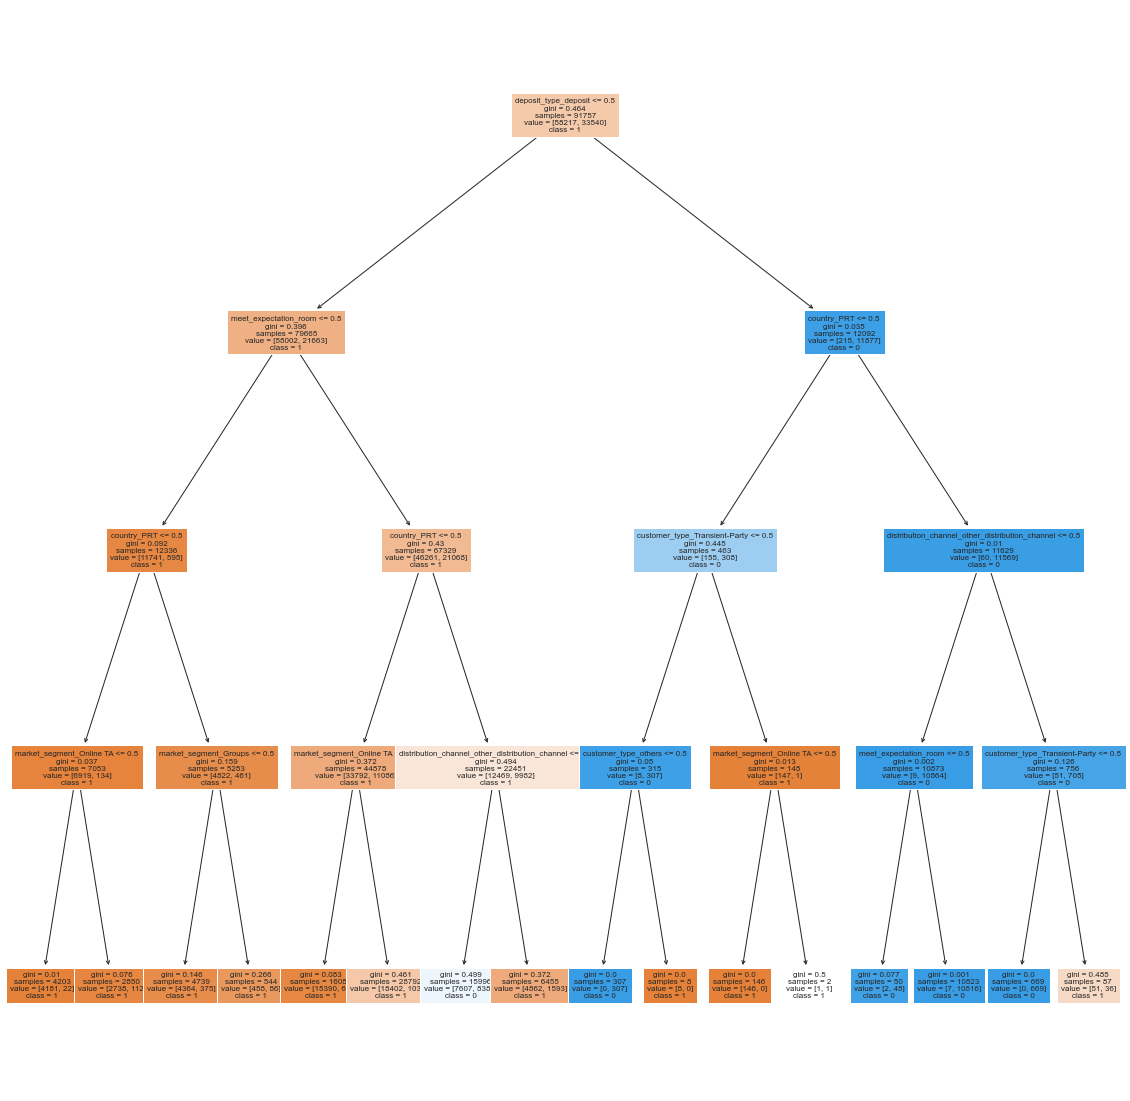

In [81]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(classTree,
                   feature_names=X.columns,  
                   class_names=['1','0'],
                   filled=True,
                   fontsize=8
                  )
fig.show()

### RESULT: it aligns! 
> ### According to the heat map + correlation table, turns out there are no multicollinearity occurs!!

## <span style="color:red"><b> **Final Set of Categorical Vars:**<br>
> **First 12th highly correlated features:**<br>
>- deposit_type_deposit (+)	
>- country_PRT (+)
>- meet_expectation_room (+)
>- market_segment_Groups (+)
>- distribution_channel_other_distribution_channel (-)
>- hotel_Resort Hotel (-)
>- country_other_countries	(-)
>- country_FRA	(-)
>-customer_type_Transient-Party	(-)
>- country_GBR	(-)
>- arrival_date_month_9.0 (+)
>- market_segment_other_market_segment	(-)	
<br>
    
    
## <span style="color:red"><b></b>**5th Decision:**</span><br> 

> **Dropped features with which is not in the first 12th rank (correlation less than 10%) :**<br>

>- country_ESP
>- arrival_date_month_8.0
>- arrival_date_month_2.0
>- arrival_date_month_3.0
>- arrival_date_month_12.0
>- market_segment_Online TA
>- arrival_date_month_11.0
>- customer_type_others
>- arrival_date_month_4.0
>- arrival_date_month_7.0
>- arrival_date_month_5.0
>- market_segment_Offline TA/TO
>- meal_other_meals
>- arrival_date_month_10.0
>- arrival_date_month_6.0

In [82]:
# Let's drop these features out!
 
df_encode.drop(['country_ESP',
'arrival_date_month_8.0',
'arrival_date_month_2.0',
'arrival_date_month_3.0',
'arrival_date_month_12.0',
'market_segment_Online TA',
'arrival_date_month_11.0',
'customer_type_others',
'arrival_date_month_4.0',
'arrival_date_month_7.0',
'arrival_date_month_5.0',
'market_segment_Offline TA/TO',
'meal_other_meals',
'arrival_date_month_10.0',
'arrival_date_month_6.0'
], axis=1, inplace=True)

In [83]:
df_encode.head()

is_canceled  row_num  meet_expectation_room  hotel_Resort Hotel  \
0            0        0                      1                   1   
1            0        2                      0                   1   
2            0        3                      1                   1   
3            0        4                      1                   1   
4            0        5                      1                   1   

   arrival_date_month_9.0  country_FRA  country_GBR  country_PRT  \
0                       0            0            0            1   
1                       0            0            1            0   
2                       0            0            1            0   
3                       0            0            1            0   
4                       0            0            1            0   

   country_other_countries  market_segment_Groups  \
0                        0                      0   
1                        0                      0   
2                        0                      0   
3                        0                      0   
4                        0                      0   

   market_segment_other_market_segment  \
0                                    0   
1                                    0   
2                                    1   
3                                    0   
4                                    0   

   distribution_channel_other_distribution_channel  deposit_type_deposit  \
0                                                1                     0   
1                                                1                     0   
2                                                1                     0   
3                                                0                     0   
4                                                0                     0   

   customer_type_Transient-Party  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

[Go to Data Prep Outline](#data-prep)

### Let's merge numerical and categorical together!

In [84]:
df_all = pd.merge(df_temp,df_encode, on ='row_num',how = 'left')
df_all.drop(['is_canceled_y'], axis=1, inplace=True)
df_all.rename(columns = {'is_canceled_x':'is_canceled'}, inplace = True)
df_all.head()

is_canceled  lead_time  adults  is_repeated_guest  previous_cancellations  \
0            0        342       2                  0                       0   
1            0          7       1                  0                       0   
2            0         13       1                  0                       0   
3            0         14       2                  0                       0   
4            0         14       2                  0                       0   

   previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
0                               0                3                     0   
1                               0                0                     0   
2                               0                0                     0   
3                               0                0                     0   
4                               0                0                     0   

    adr  required_car_parking_spaces  total_of_special_requests  row_num  \
0  0.00                            0                          0        0   
1 75.00                            0                          0        2   
2 75.00                            0                          0        3   
3 98.00                            0                          1        4   
4 98.00                            0                          1        5   

   meet_expectation_room  hotel_Resort Hotel  arrival_date_month_9.0  \
0                      1                   1                       0   
1                      0                   1                       0   
2                      1                   1                       0   
3                      1                   1                       0   
4                      1                   1                       0   

   country_FRA  country_GBR  country_PRT  country_other_countries  \
0            0            0            1                        0   
1            0            1            0                        0   
2            0            1            0                        0   
3            0            1            0                        0   
4            0            1            0                        0   

   market_segment_Groups  market_segment_other_market_segment  \
0                      0                                    0   
1                      0                                    0   
2                      0                                    1   
3                      0                                    0   
4                      0                                    0   

   distribution_channel_other_distribution_channel  deposit_type_deposit  \
0                                                1                     0   
1                                                1                     0   
2                                                1                     0   
3                                                0                     0   
4                                                0                     0   

   customer_type_Transient-Party  
0                              0  
1                              0  
2                              0  
3                              0  
4                              0

In [85]:
df_all.shape

(91757, 24)

><h3>4.6 Data Partitioning </h3> <a class="anchor" id="data-split"></a>
<br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X' <br>
>2. Put target variable in new object called 'y'<br>
>3. Partition data into training set and testing set<br>

In [86]:
# target = ['is_canceled']
# I will drop 'row_num' off my model as I already used it to map the exact same data rows between numeric variables 
# and categorical variables!

X = df_all.drop(['is_canceled','row_num'],axis=1)
y = df_all['is_canceled']

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=23)

In [87]:
y_test.sum()/len(y_test)

0.3669718105201976

In [88]:
y_train.sum()/len(y_train)

0.36491304550903797

### <span style="color:red"><b>NOTE: <br> 
**Choose random_state= 23** to avoid some bias once performing any prediction. After randomly picking this number, the y_test ratio is relatively close to y_train ratio compare to other random_state number. Therefore, I pick this random_state number as I assume it causes less bias.
>[Go to Data Prep Outline](#data-prep)
---

><h3>4.8 Data Normalization </h3> <a class="anchor" id="normalization"></a>
<br><br>

> ### **NOTE:**<br>
>- We do this AFTER splitting the data because we only want to use summary stats<br>
>  from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
>- <span style="color:red"><b>I will apply only in **Logistic Model, kNN and ANN** only as they are sensitive to normalization while Decision tree and randomforest are not.<br>
<br><br>


In [89]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

# set name to seperate data as there are some model that sensitive to normalization 
X_train_norm = (X_train - features_means)/features_std
X_test_norm = (X_test - features_means)/features_std

[Go to Data Prep Outline](#data-prep)

# 5. Machine Learning Model <a class="anchor" id="ml_model"></a>  <a class="anchor" id="mlm"></a>

- [X] [Logistic Model](#first-model)
- [X] [kNN](#second-model)
- [X] [Decistion tree](#third-model)
- [X] [Random forest](#fouth-model)
- [X] [Artificial neural network](#fifth-model)



* [Go to Top of Notebook](#table-of-content)

### As a Data Scientist who is working for a large chain of international hotels, <span style="color:red"><b>False Negative (FN)<br> <span style="color:black"><b>is what I will focus on as well apart from the model accuracy and AUC& ROC scores. I want its value to be as low as it can be as in my perspective, guests are what the hotel prioritize the most before anything else. Therefore to predict that a particular guest will cancel the room while actually they do not is a huge deal. The hotels can lose their reputation and maybe a loyal cutomers as well which far more worse than their cost of managment.  

 ## 1. **Logistic Model:**<br> <a class="anchor" id="first-model"></a>
>Let's produce the same table above but this time using a Logistic Model

In [276]:
lr_model = LogisticRegression(random_state=23)
lr_model.fit(X_train_norm,y_train.values.ravel())

# Use X_norm as Logistic Model is sensitive to normalization
y_train_pred_class_lr = lr_model.predict(X_train_norm)
y_test_pred_class_lr = lr_model.predict(X_test_norm)

### Creating customed template to show performance   

In [277]:
print("LogisticRegression train accuracy: ", lr_model.score(X_train_norm,y_train))
print("LogisticRegression test accuracy: ", lr_model.score(X_test_norm,y_test))
print("============")
print("LogisticRegression train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_lr))
print("LogisticRegression test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_lr))
print("============")
print(classification_report(y_test, y_test_pred_class_lr))

LogisticRegression train accuracy:  0.8075791309221692
LogisticRegression test accuracy:  0.8028916012786981
LogisticRegression train roc auc score:  0.7650974208551786
LogisticRegression test roc auc score:  0.7604794575190738
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     17426
           1       0.81      0.60      0.69     10102

    accuracy                           0.80     27528
   macro avg       0.81      0.76      0.77     27528
weighted avg       0.80      0.80      0.80     27528



**Want recall to be high as I focus more on eliminating FN**

## <span style="color:Green"><b>RESULT:<br>
### Seems like there is no overffitting issues! This is because there are almost no differences between train, test accuracy + train, test of roc auc score. 

In [278]:
class_perf_measures(lr_model,X_test_norm,y_test)

threshold     TP     TN     FP     FN  Precision  Recall  Accuracy  MSE
0        0.00  10102      0  17426      0       0.37    1.00      0.37 0.63
1        0.10   9845   6204  11222    257       0.47    0.97      0.58 0.42
2        0.20   9245   9945   7481    857       0.55    0.92      0.70 0.30
3        0.30   8294  12913   4513   1808       0.65    0.82      0.77 0.23
4        0.40   7157  14876   2550   2945       0.74    0.71      0.80 0.20
5        0.50   6072  16030   1396   4030       0.81    0.60      0.80 0.20
6        0.60   5281  16726    700   4821       0.88    0.52      0.80 0.20
7        0.70   4624  17129    297   5478       0.94    0.46      0.79 0.21
8        0.80   4164  17337     89   5938       0.98    0.41      0.78 0.22
9        0.90   3871  17392     34   6231       0.99    0.38      0.77 0.23
10       1.00     44  17426      0  10058       1.00    0.00      0.63 0.37

FP= predicted yes while actual no ==> predicted that there will be a cancellation while actually it is not<br>
FN= predicted that a particular booking is not cancel while actually it is

### PREFER threshold:
FN focus = guests/ customers always are 1st priority. More important than the profit!
Choose threshold 0.4
### <span style="color:Orange"><b>HOWEVER,
### <span style="color:orange"><b> as I want to compare and find the best model among 5 others, I will choose to use the same threshold which is the default value of 0.5 to compare the accuracy, MSE and recall with others, then later on I will use the PREFER threshold to apply with my final winning model.  <br>
## <span style="color:Red"><b>Decision for this model:<br>
Apart from focusing in accuracy, roc and auc together with F1 scores, I also want to check on False Negative side as well. By that, according to the formula 'recall= TP/TP+FN', I will definitely want the recall accuracy to be as high as it could be. Therefore, 80.29% of accuracy score, 76.05% of roc& auc score and these 60% of recall together with 69% of F1-scores are considered not high enough for me so, I will try to explore more models first then decide which is my winning model later on as I believe they can be higher! <br>
    
> FYI: F1-score is a statistical measure of the accuracy of a test or an individual. It is composed of two primary attributes=> precision& recall [LINK](https://www.myaccountingcourse.com/accounting-dictionary/f1-score)
    
    

>[Go to the Top of 5. section](#mlm)

## 2. **kNN** <a class="anchor" id="second-model"></a>
<br>

>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [347]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_norm,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class_knn = knn.predict(X_test_norm)
    y_pred_train_class_knn = knn.predict(X_train_norm)
    
    # Put Accuracy Score in results object between train and test to check for overfitting!
    results.append({'k':k,
                    'Train Accuracy':metrics.accuracy_score(y_train,y_pred_train_class_knn),
                    'Test Accuracy':metrics.accuracy_score(y_test,y_pred_class_knn)
                   }
                  )
# Put results from above into a Pandas Dataframe and create customed function to check for the delta between 2 accuracy!
results_df = pd.DataFrame(results)
results_df['diff_train_test'] = results_df['Train Accuracy'] - results_df['Test Accuracy']
results_df

k  Train Accuracy  Test Accuracy  diff_train_test
0    1            0.99           0.83             0.15
1    3            0.91           0.84             0.07
2    5            0.89           0.84             0.05
3    7            0.88           0.84             0.04
4    9            0.87           0.84             0.03
5   11            0.87           0.84             0.03
6   13            0.87           0.84             0.02
7   15            0.86           0.84             0.02
8   17            0.86           0.84             0.02
9   19            0.86           0.84             0.02
10  21            0.86           0.84             0.02

>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 13. This is because we have to depen on the highest and most stable value of k which in this case, is 0.84.  Although they are the same in every k starting from k=3, to avoid overfitting, I decided to see the train accuracy as well to see the different between them. Among 0.84 k values, the minimum different between the train and test accuracy is 0.02 and starting from k=13. However, k values starting from 15, their train performances have dropped from 0.87 to 0.86. Therefore, I choose k= 13 since this is the lowest value that achieves the highest accuracy value and can avoid the overfitting!  <br>

 ### <span style="color:red"><b>NOTE: The higher number of k, the more underfitting issue to arise.<b>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, I will produce a table of performance measures across a range of probability threshold values

In [348]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_norm,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class_knn = knn.predict(X_train_norm)
y_test_pred_class_knn = knn.predict(X_test_norm)

In [349]:
print("kNN train accuracy: ", knn.score(X_train_norm,y_train))
print("kNN test accuracy: ", knn.score(X_test_norm,y_test))
print("============")
print("kNN train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_knn))
print("kNN test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_knn))
print("============")
print(classification_report(y_test,y_test_pred_class_knn))

kNN train accuracy:  0.8654190474707687
kNN test accuracy:  0.8417974426038942
kNN train roc auc score:  0.8418624388526262
kNN test roc auc score:  0.8159018400243603
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     17426
           1       0.83      0.72      0.77     10102

    accuracy                           0.84     27528
   macro avg       0.84      0.82      0.82     27528
weighted avg       0.84      0.84      0.84     27528



## <span style="color:Green"><b>RESULT:<br>
### Seems like there is no overffitting issues! This is because there are almost no differences between train, test accuracy + train, test of roc auc score. Moreover, since I will focus more on False Negative side, therefore, I would want the recall accuracy to be as high as it could be (From recall= TP/TP+FN). For me, this 72% of recall is considered good but I will try more model to see as I believe it can be higher.  

In [350]:
class_perf_measures(knn,X_test_norm,y_test)

threshold     TP     TN     FP    FN  Precision  Recall  Accuracy  MSE
0        0.00  10102      0  17426     0       0.37    1.00      0.37 0.63
1        0.10   9589   9672   7754   513       0.55    0.95      0.70 0.30
2        0.20   9198  11732   5694   904       0.62    0.91      0.76 0.24
3        0.30   8751  13295   4131  1351       0.68    0.87      0.80 0.20
4        0.40   7769  15302   2124  2333       0.79    0.77      0.84 0.16
5        0.50   7259  15914   1512  2843       0.83    0.72      0.84 0.16
6        0.60   6815  16383   1043  3287       0.87    0.68      0.84 0.16
7        0.70   5828  16986    440  4274       0.93    0.58      0.83 0.17
8        0.80   5328  17202    224  4774       0.96    0.53      0.82 0.18
9        0.90   4893  17324    102  5209       0.98    0.48      0.81 0.19
10       1.00   4504  17396     30  5598       0.99    0.45      0.80 0.20

### PREFER threshold:
FN focus = guests/ customers always are 1st priority. More important than the profit!
I will go with threshold 0.4 as it has the highest accuracy, lowest MSE and highest recall in the same accuracy and MSE percentage scores. 

## <span style="color:Red"><b>Decision for this model:<br>
Apart from focusing in accuracy, roc and auc together with F1 scores, I also want to check on False Negative side as well. By that, according to the formula 'recall= TP/TP+FN', I will definitely want the recall accuracy to be as high as it could be. Therefore, 84.18% of accuracy score, 81.59% of roc& auc score, 77% of F1-score and this 72% of recall are much better than the logistic model! However, I will try to explore more models first then decide which is my winning model later on as I believe they can be higher! <br>

>[Go to the Top of 5. section](#mlm)

## 3. **Decision tree** <a class="anchor" id="third-model"></a>

##### I will not do the data normalization as according to this [LINK](https://www.educba.com/decision-tree-advantages-and-disadvantages/#:~:text=Normalization%20is%20not%20required%20in%20the%20Decision%20Tree.,its%20feature%20scaling.%20Another%20one%20is%20random%20forests.)

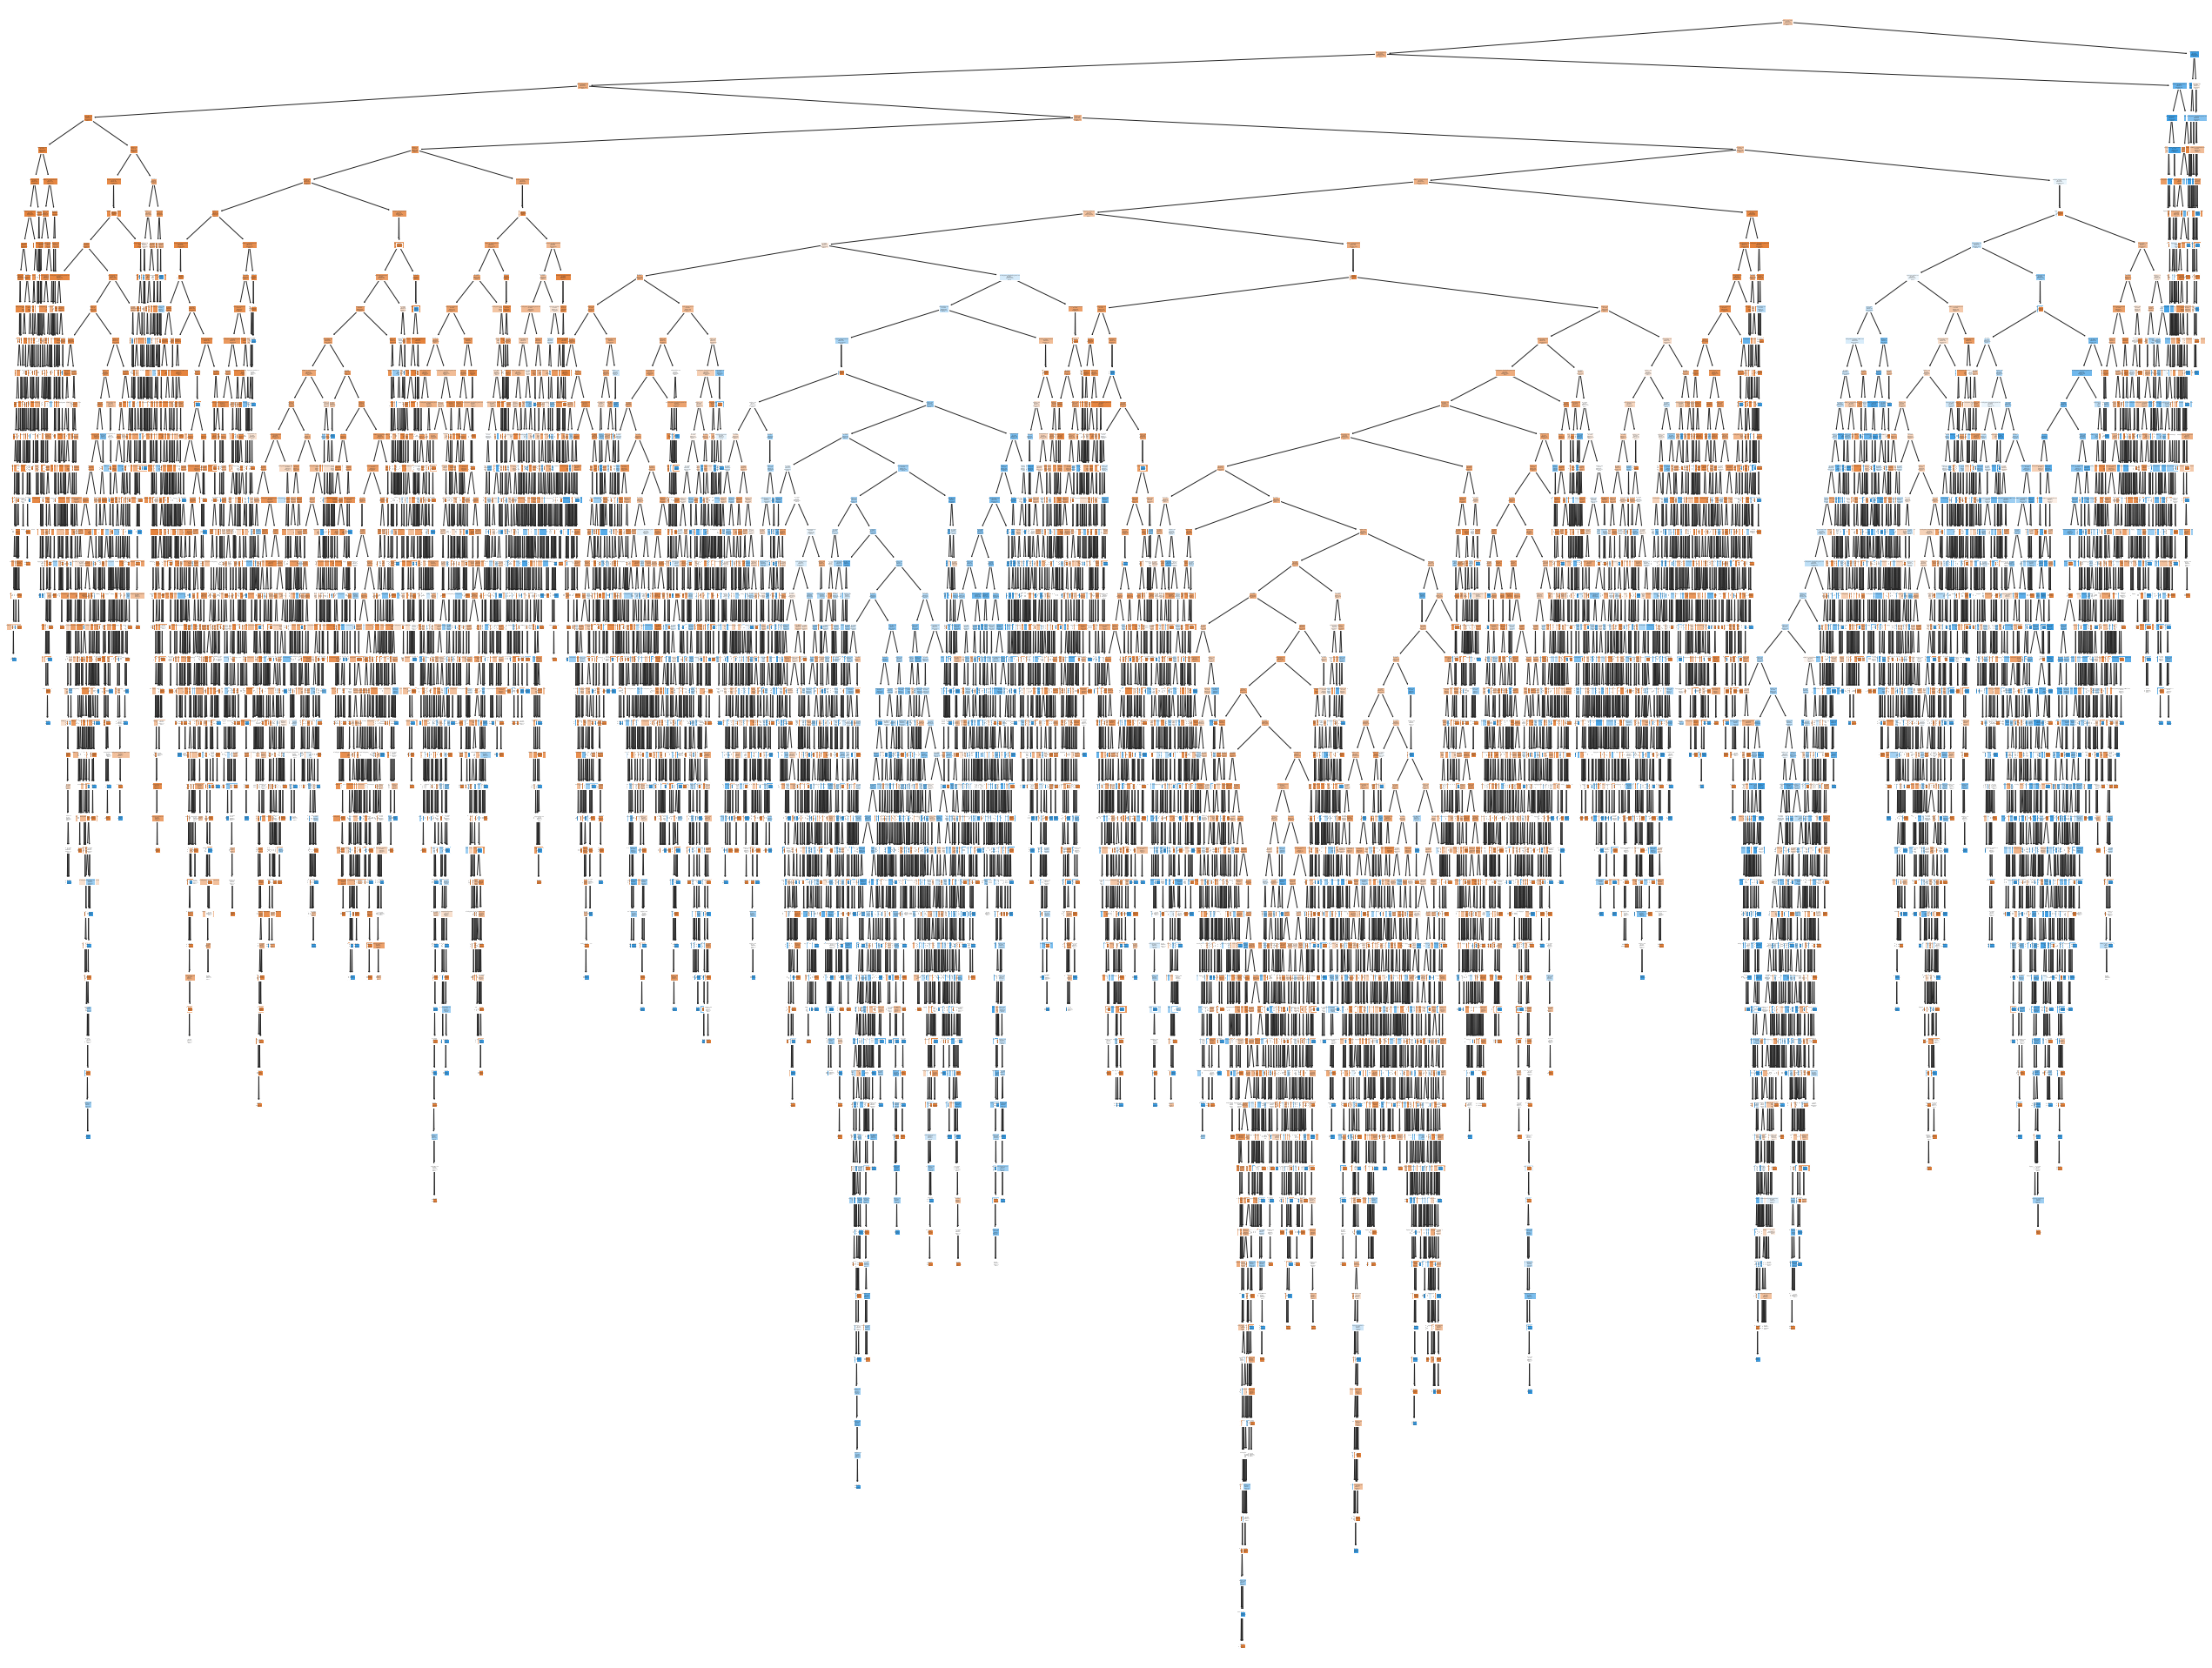

In [98]:
dt = DecisionTreeClassifier(random_state=1)                     # I choose to fix value by seed using random_state= 1         
dt.fit(X_train,y_train)

y_train_pred_class_dt = dt.predict(X_train)
y_test_pred_class_dt = dt.predict(X_test)

fig = plt.figure(figsize=(45,35))                               # For indicating the decision tree picture size
tree.plot_tree(dt, feature_names=X_train.columns,  
                   class_names=['1','0'],
                   filled=True
                  )
fig.show()


### NOTE:
### Seems like there are lottttts of internal node layers so, I will roughly check on the overfitting issue by plotting the confusion matrix and calculating the error rate to see first 

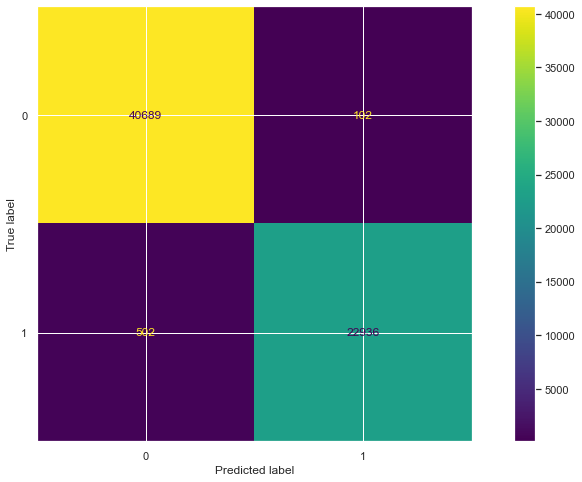

In [99]:
plot_confusion_matrix(dt,X_train,y_train)

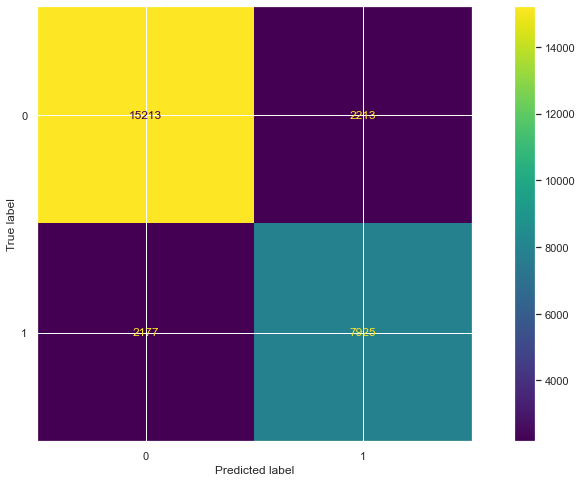

In [100]:
plot_confusion_matrix(dt,X_test,y_test)

In [101]:
error_rate = (2213+2177)/(2213+2177+15213+7925)
print(error_rate)

0.15947399011915142


## NOTE: 
### According to the error rate, although it seems to not having the overfitting issues (only 15.95%), I decided to prune the tree as this model tend to cause this issue easily and its performance dropped when apply the data that it never sees before. Therefore, I better be precautious about it. Moreover, I will check the scores between train and test to see how much they different to each other to indentify the overfitting as well

In [102]:
print("Decision Tree train accuracy: ", dt.score(X_train,y_train))
print("Decision Tree test accuracy: ", dt.score(X_test,y_test))
print("============")
print("Decision Tree train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_dt))
print("Decision Tree test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_dt))
print("============")
print(classification_report(y_test, y_test_pred_class_dt))

Decision Tree train accuracy:  0.9905961481573744
Decision Tree test accuracy:  0.8405260098808486
Decision Tree train roc auc score:  0.9880406193314392
Decision Tree test roc auc score:  0.8287519862534707
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     17426
           1       0.78      0.78      0.78     10102

    accuracy                           0.84     27528
   macro avg       0.83      0.83      0.83     27528
weighted avg       0.84      0.84      0.84     27528



### The different between Train and test from accuracy + ROC& AUC scores are 10% ++ differences==> that's suspicious! 
##  <span style="color:Red"><b>Therefore, let's prune this complex tree using cost complexity pruning to find the best alpha to use


In [103]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

In [104]:
len(ccp_alphas)

4112

### There are 4,112 alphas which is a LOTTTT for me to choose one to prune me tree!

> Do I have to iterate through all of them?
> No, I do not! I can write code to show every 20th position of alpha (20 is a random number I pick as I have a total of 4,112 alphas and this split by 20 will help split a proper amount of alphas to me!)

In [105]:
ccp_alphas[0::20]

array([0.00000000e+00, 3.89232278e-07, 7.78464557e-07, 1.34514096e-06,
       2.07590548e-06, 2.59488186e-06, 2.85319589e-06, 3.53847526e-06,
       3.89232278e-06, 4.15181097e-06, 4.75728340e-06, 5.18976371e-06,
       5.18976371e-06, 5.18976371e-06, 5.18976371e-06, 5.56046112e-06,
       6.22771645e-06, 6.84907592e-06, 7.26566919e-06, 7.64563404e-06,
       7.78464557e-06, 7.78464557e-06, 8.30362194e-06, 8.30362194e-06,
       8.64960618e-06, 8.89673779e-06, 9.22624660e-06, 9.34157468e-06,
       9.43593402e-06, 9.63813260e-06, 9.76896698e-06, 9.88526421e-06,
       1.00088300e-05, 1.00912072e-05, 1.02447284e-05, 1.03628722e-05,
       1.03795274e-05, 1.03795274e-05, 1.03795274e-05, 1.03795274e-05,
       1.03795274e-05, 1.03795274e-05, 1.03795274e-05, 1.03795274e-05,
       1.07884179e-05, 1.11209222e-05, 1.13406760e-05, 1.16173159e-05,
       1.16769683e-05, 1.16769683e-05, 1.16769683e-05, 1.16769683e-05,
       1.16769683e-05, 1.18623171e-05, 1.19398485e-05, 1.21493699e-05,
      

In [106]:
dts = []

for ccp_alpha in ccp_alphas[0::20]:
    dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dt.fit(X_train,y_train)
    dts.append(dt)

### To see how accuracy changes when I prune my tree

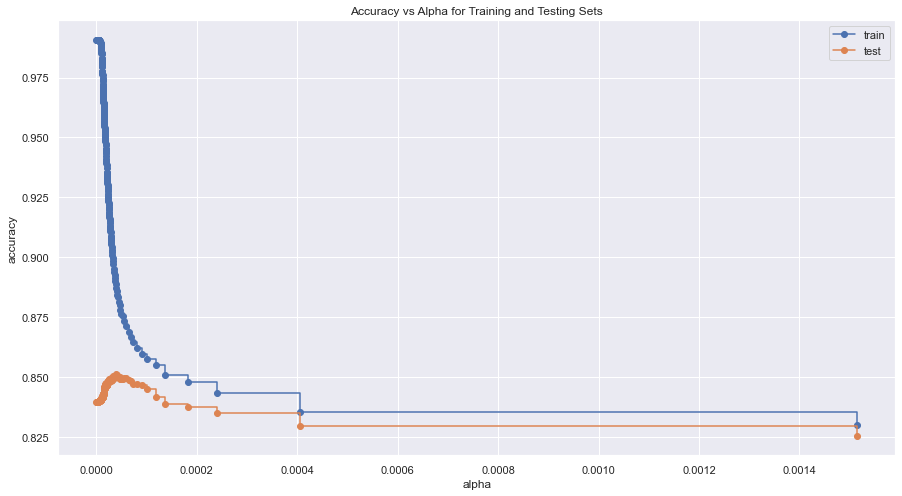

In [107]:
# Use .score to show accuracy
train_scores = [dt.score(X_train,y_train) for dt in dts]
test_scores = [dt.score(X_test,y_test) for dt in dts]

fix, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs Alpha for Training and Testing Sets")
ax.plot(ccp_alphas[0::20], train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[0::20], test_scores, marker='o', label="test",drawstyle='steps-post')
ax.legend()
plt.show()

### Trial1: using the last ccp_alpha value (1.51519426e-03)

In [312]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=1.51519426e-03)   
dt.fit(X_train,y_train)

y_train_pred_class_dt = dt.predict(X_train)
y_test_pred_class_dt = dt.predict(X_test)

<Figure size 18000x9600 with 0 Axes>

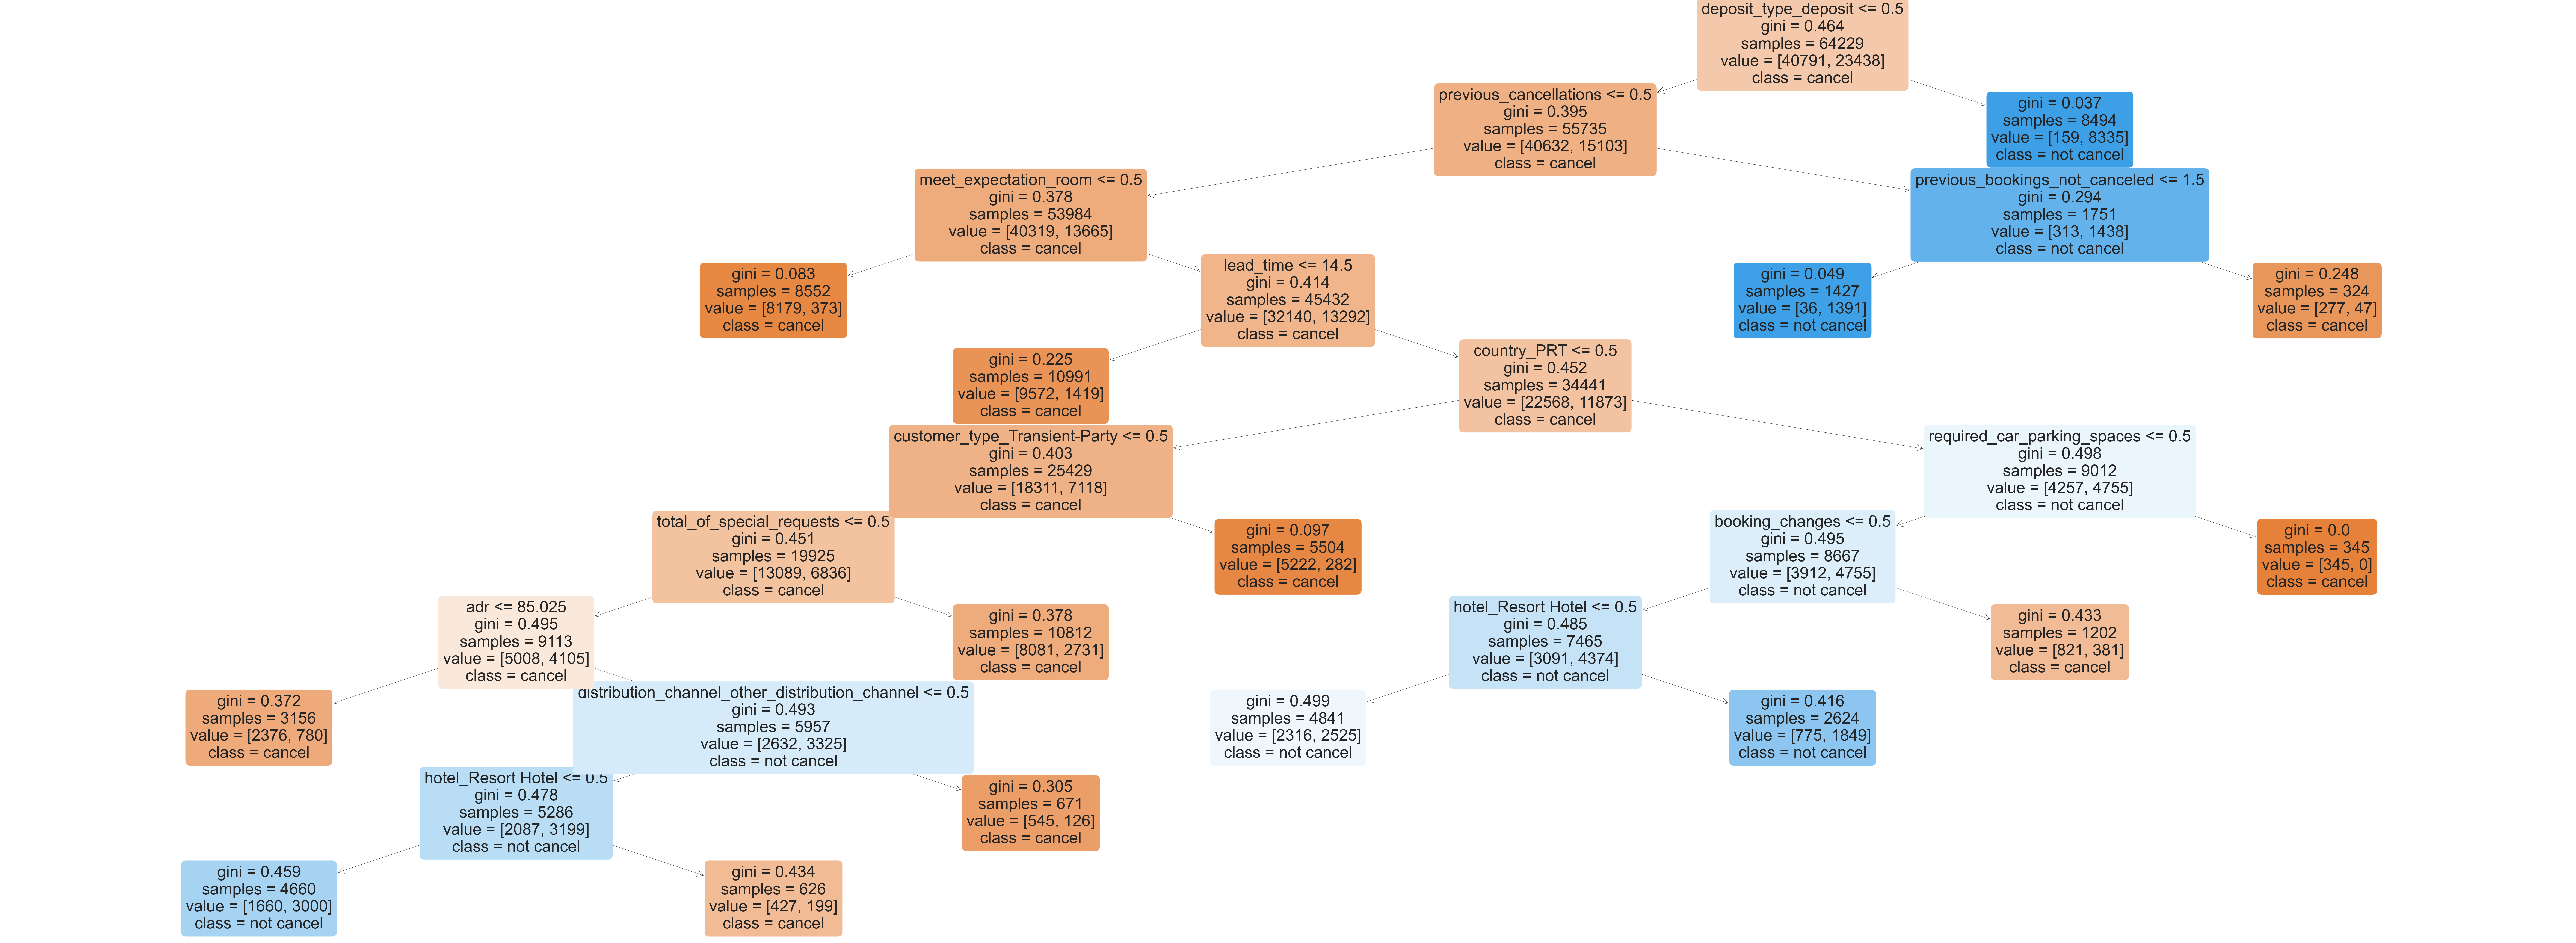

In [313]:
plt.figure(dpi=1200)
fig = plt.figure(figsize=(200,75))                     # Adjusting new figsize to visual the better picture of decision tree
plot_tree(dt,
          filled=True,
          rounded=True,
          class_names=['cancel','not cancel'],
          feature_names=X_train.columns
         );

In [314]:
print("Decision Tree train accuracy: ", dt.score(X_train,y_train))
print("Decision Tree test accuracy: ", dt.score(X_test,y_test))
print("============")
print("Decision Tree train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_dt))
print("Decision Tree test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_dt))
print("============")
print(classification_report(y_test,y_test_pred_class_dt))

Decision Tree train accuracy:  0.8243161188871071
Decision Tree test accuracy:  0.8206190061028771
Decision Tree train roc auc score:  0.8041660992594877
Decision Tree test roc auc score:  0.7991947645322656
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     17426
           1       0.78      0.72      0.75     10102

    accuracy                           0.82     27528
   macro avg       0.81      0.80      0.80     27528
weighted avg       0.82      0.82      0.82     27528



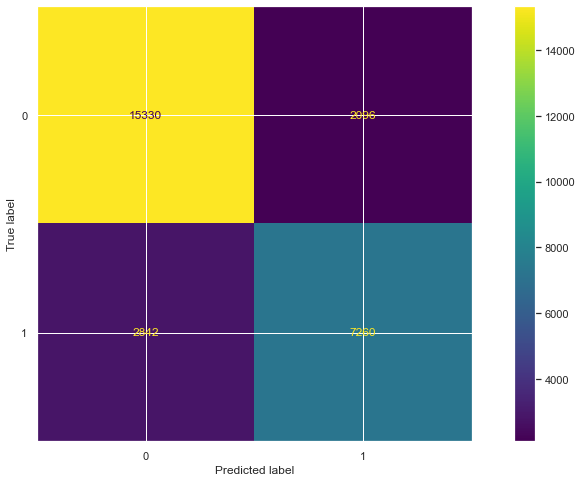

In [315]:
# check only test side as I want it to perform better!
plot_confusion_matrix(dt,X_test,y_test)

In [316]:
error_rate = (2096+2812)/(2096+2812+15330+7260)
print(error_rate)

0.17848570805149466


### Question from curiosity:
> Seems like the error rate from test model is increasing :( why is that? and if this means that my decision tree model is really free from overfitting issue? 
>- Will try using the second option of alpha to see how improve my error rate will be.


### Trial2: using the second to last ccp_alpha value (4.04984714e-04)

In [317]:
dt = DecisionTreeClassifier(random_state=0, ccp_alpha=4.04984714e-04)   
dt.fit(X_train,y_train)

y_train_pred_class_dt = dt.predict(X_train)
y_test_pred_class_dt = dt.predict(X_test)

<Figure size 18000x9600 with 0 Axes>

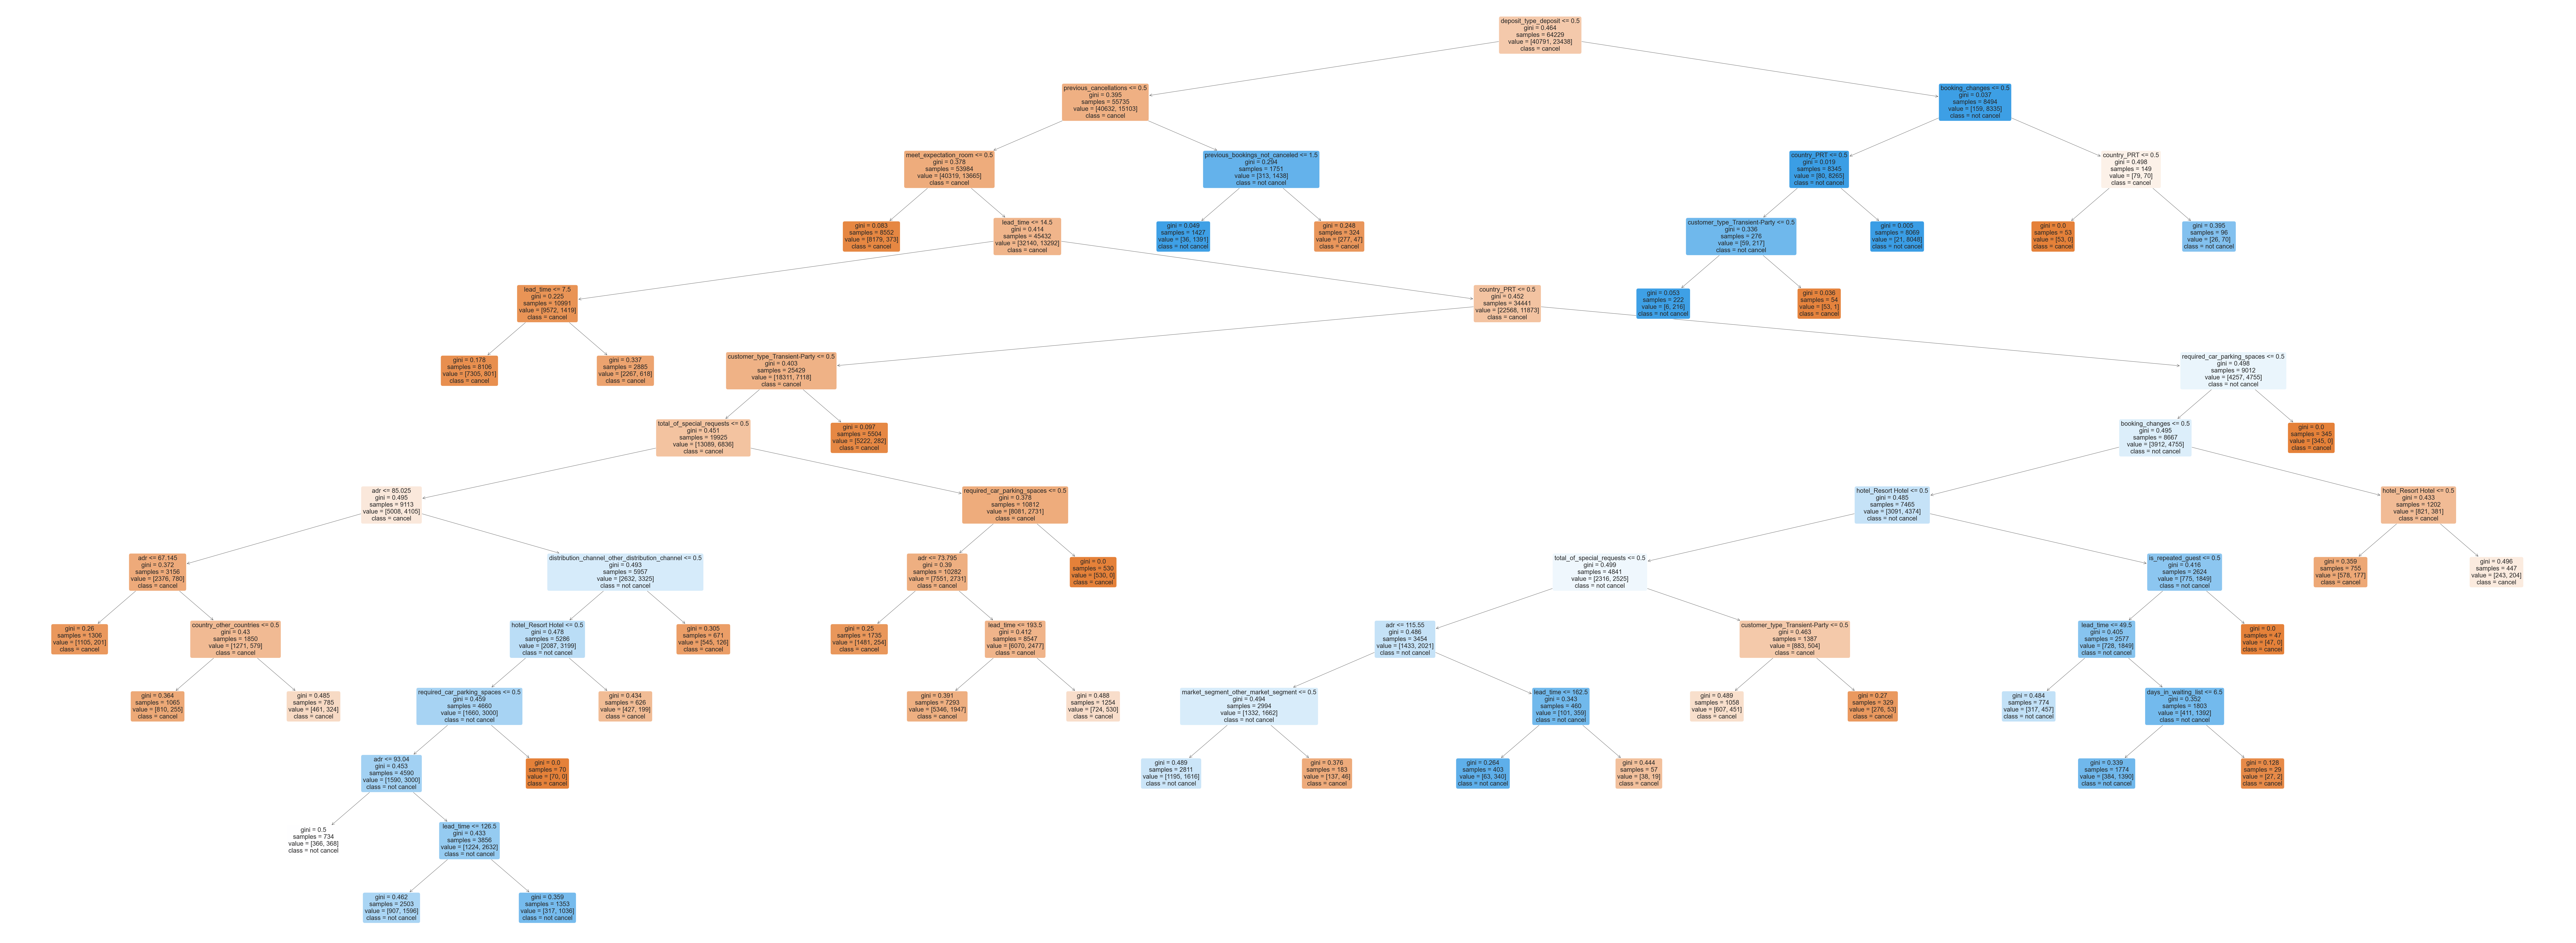

In [318]:
plt.figure(dpi=1200)
fig = plt.figure(figsize=(200,75))                     # Adjusting new figsize to visual the better picture of decision tree
plot_tree(dt,
          filled=True,
          rounded=True,
          class_names=['cancel','not cancel'],
          feature_names=X_train.columns
         );

In [319]:
print("Decision Tree train accuracy: ", dt.score(X_train,y_train))
print("Decision Tree test accuracy: ", dt.score(X_test,y_test))
print("============")
print("Decision Tree train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_dt))
print("Decision Tree test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_dt))
print("============")
print(classification_report(y_test,y_test_pred_class_dt))

Decision Tree train accuracy:  0.8357751171589157
Decision Tree test accuracy:  0.8295916884626562
Decision Tree train roc auc score:  0.807996641355333
Decision Tree test roc auc score:  0.8008108467736741
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     17426
           1       0.82      0.69      0.75     10102

    accuracy                           0.83     27528
   macro avg       0.83      0.80      0.81     27528
weighted avg       0.83      0.83      0.83     27528



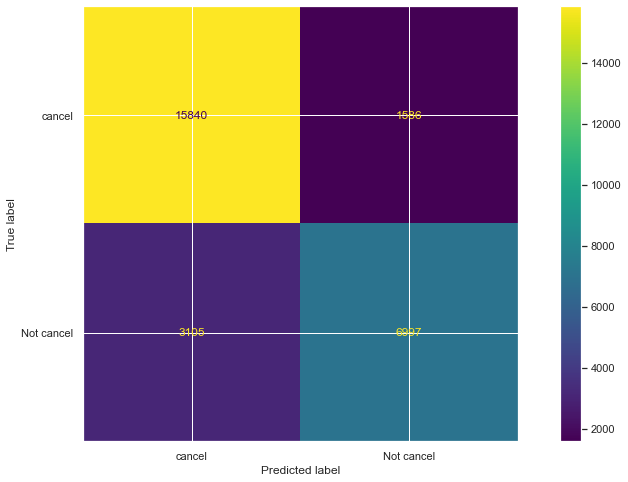

In [320]:
plot_confusion_matrix(dt,X_test,y_test,
                      display_labels=['cancel','Not cancel'])

In [118]:
error_rate = (3195+1586)/(3195+1586+15840+6897)
print(error_rate)

0.17374082418780434


### NOTE and Q from curiosity:
### - The error rate has decreased to 17.37% but still higher than the model before pruning. Did I do something wrong or actually I really mitigate the issue of overfitting? 
> No! the error rate is 17.37% accuracy. Therefore, I did not do something wrong as pruning= lower the overfitting severity so, it will decrease accuracy which can result in higher error rate 

## <span style="color:red"><b>NOTE:
### Now, I have try to eliminate the overfitting issue by trying to use the reasonable alphas which are the last and second to last to help pruning the tree back. However, I will go with the last alpha since if I use the second to last alpha value,  recall will drop (72 to 69%) and that's the value I would like it to be high. 
## <span style="color:Green"><b>RESULT:<br>
### The different between train and test accuracy + ROC& AUC score are much better after pruning! their gap decrease from 10%++ to almost equal to each other!!!

In [303]:
class_perf_measures(dt,X_test,y_test)

threshold     TP     TN     FP     FN  Precision  Recall  Accuracy  MSE
0        0.00  10102      0  17426      0       0.37    1.00      0.37 0.63
1        0.10   9476   9156   8270    626       0.53    0.94      0.68 0.32
2        0.20   9166  10743   6683    936       0.58    0.91      0.72 0.28
3        0.30   8039  14186   3240   2063       0.71    0.80      0.81 0.19
4        0.40   7477  15253   2173   2625       0.78    0.74      0.83 0.17
5        0.50   7011  15826   1600   3091       0.81    0.69      0.83 0.17
6        0.60   5939  16611    815   4163       0.88    0.59      0.82 0.18
7        0.70   4906  17179    247   5196       0.95    0.49      0.80 0.20
8        0.80   4098  17402     24   6004       0.99    0.41      0.78 0.22
9        0.90   4098  17402     24   6004       0.99    0.41      0.78 0.22
10       1.00      0  17426      0  10102       0.00    0.00      0.63 0.37

### PREFER threshold:
FN focus = guests/ customers always are 1st priority. More important than the profit!
I will go with threshold 0.4 as it has the highest accuracy, lowest MSE and highest recall in the same accuracy and MSE percentage scores. 

## <span style="color:Red"><b>Decision for this model:<br>
Apart from focusing in accuracy, roc and auc together with F1 scores, I also want to check on False Negative side as well. By that, according to the formula 'recall= TP/TP+FN', I will definitely want the recall accuracy to be as high as it could be. Therefore, 82.06% of accuracy score, 79.92% of roc& auc score and these 72% of recall together with 75% of F1-score are considered underperforming than the kNN model. With that I will try to explore more models first then decide which is my winning model later on as I believe they can be higher and related less to overfitting! <br>

>[Go to the Top of 5. section](#mlm)

## 4. **Random Forest** <a class="anchor" id="fouth-model"></a>

### FYI: I will try to make the simpliest random forest as much as I can based on my own judgement first to see how well or better than other models of the accuracy, ROC&AUC together with recall and F1- score perform first! If they all perform better, I will then dive down using Grid Search Cross Validation to help picking the right parameter values in more detail later on.
##### - I will not do the data normalization as according to this [LINK](https://www.kdnuggets.com/2022/07/random-forest-algorithm-need-normalization.html)
##### - To help with the max_depth value decision [LINK](https://crunchingthedata.com/max-depth-in-random-forests/#:~:text=In%20general%2C%20it%20is%20good%20to%20keep%20the,max%20depth%20values%20ranging%20from%201%20to%2020.)
>'In general, it is good to keep the lower bound on the range of values close to one. There are many cases where random forests with a max depth of one have been shown to be highly effective. The upper bound on the range of values to consider for max depth is a little more fuzzy. In general, we recommend trying max depth values ranging from 1 to 20.'
##### - To help with the max_feature value decision [LINK](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/) 
> 'the performance of the model initially increases as the number of max_feature increases. But, after a certain point, the train_score keeps on increasing. But the test_score saturates and even starts decreasing towards the end, which clearly means that the model starts to overfit.'

In [113]:
#For n_estimators, I will set = default value which is 100 to make the simpliest random forest model and see how well the 
# model will perform first!
#For max_depth, according to the link reference above, I decided to try the median value wich is 12 first to kind of 
# glancing the overall performance of the model first! 
#For max_features, as I have 24 features in total, I will set the value to 10 as too many features tend to increase a chance
# of overfitting therefore, 10 is a proper value that I choose to go with.
#For random_state, I will fix the seed = 0 so that my score will remain the same!
rf = RandomForestClassifier(n_estimators= 100, 
                            max_depth= 12, 
                            max_features= 10, 
                            random_state= 0,
                            )

rf.fit(X_train,y_train)

y_train_pred_class_rf = rf.predict(X_train)
y_test_pred_class_rf = rf.predict(X_test)

print(metrics.accuracy_score(y_test,y_test_pred_class_rf).round(2))

0.84


In [114]:
print("Random Forest train accuracy: ", rf.score(X_train,y_train))
print("Random Forest test accuracy: ", rf.score(X_test,y_test))
print("============")
print("Random Forest train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_rf))
print("Random Forest test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_rf))
print("============")
print(classification_report(y_test, y_test_pred_class_rf))

Random Forest train accuracy:  0.8556726712232792
Random Forest test accuracy:  0.844449287997675
Random Forest train roc auc score:  0.8299237995718881
Random Forest test roc auc score:  0.8165818487306894
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     17426
           1       0.84      0.71      0.77     10102

    accuracy                           0.84     27528
   macro avg       0.84      0.82      0.83     27528
weighted avg       0.84      0.84      0.84     27528



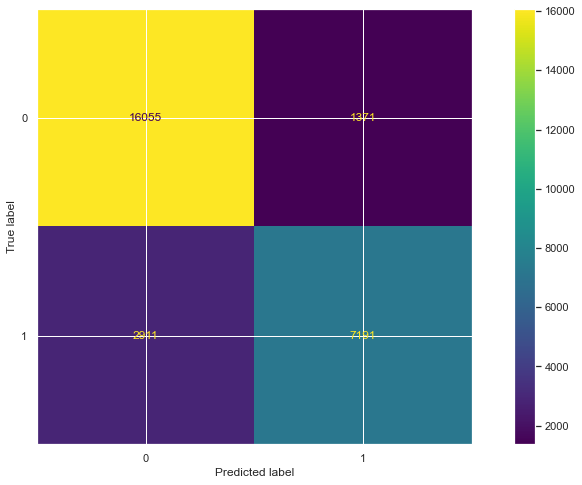

In [365]:
plot_confusion_matrix(rf,X_test,y_test)

In [119]:
error_rate = (2911+1371)/(2911+1371+16055+7191)
print(error_rate)

0.1555507120023249


#### NOTE:
#### I will use this 15.56% error rate to help compare how better the model will be after applying the GridSearchCV in to this model

## <span style="color:Green"><b>RESULT:<br>
### Seems like there is no overffitting issues! This is because there are almost no differences between train, test accuracy + train, test of roc auc score. 

In [367]:
class_perf_measures(rf,X_test,y_test)

threshold     TP     TN     FP    FN  Precision  Recall  Accuracy  MSE
0        0.00  10102      0  17426     0       0.37    1.00      0.37 0.63
1        0.10   9920   8117   9309   182       0.52    0.98      0.66 0.34
2        0.20   9569  10873   6553   533       0.59    0.95      0.74 0.26
3        0.30   8494  14178   3248  1608       0.72    0.84      0.82 0.18
4        0.40   7822  15337   2089  2280       0.79    0.77      0.84 0.16
5        0.50   7191  16055   1371  2911       0.84    0.71      0.84 0.16
6        0.60   6347  16730    696  3755       0.90    0.63      0.84 0.16
7        0.70   5009  17270    156  5093       0.97    0.50      0.81 0.19
8        0.80   4254  17416     10  5848       1.00    0.42      0.79 0.21
9        0.90   4100  17426      0  6002       1.00    0.41      0.78 0.22
10       1.00   3512  17426      0  6590       1.00    0.35      0.76 0.24

### PREFER threshold:
As I will closely look in FN and want its accuracy to behigher due to the fact that guests/ customers are always the 1st priority for the hotels compare to the profit, I will choose threshold 0.4. This is because it has the highest Accuracy and lowest MSE scores compare to others! 

## <span style="color:Red"><b>Decision for this model:<br>
Apart from focusing in accuracy, roc and auc together with F1 scores, I also want to check on False Negative side as well. By that, according to the formula 'recall= TP/TP+FN', I will definitely want the recall accuracy to be as high as it could be. 84.45% of accuracy score, 81.66% of roc& auc score are sligtly better than kNN model and these 77% of F1-score together with 71% of recall scores are considered HIGH enough for me! However, I will try more one last model which is Artificial neural network to see how the performance will be!.  <br>

>[Go to the Top of 5. section](#mlm)

## 5. **Artificial Neural Network** <a class="anchor" id="fifth-model"></a>
### FYI: I will try to make the simpliest ANN as much as I can based on my own judgement first to see how well or better than other models of the accuracy, ROC&AUC together with recall and F1- score perform first! If they all perform better, I will then dive down using Grid Search Cross Validation to help picking the right parameter values in more detail later on.

- Sensitive to normalization according to [LINK](https://www.baeldung.com/cs/normalizing-inputs-artificial-neural-network)
- What is an alpha parameter? [LINK](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#:~:text=Alpha%20is%20a%20parameter%20for%20regularization%20term%2C%20aka,decision%20boundary%20plot%20that%20appears%20with%20lesser%20curvatures.)

In [120]:
#number= nodes (20,20,20) 3 hiddenlayers each hiddenlayer= 20 nodes
# try twice the size of n_features
#L2 regularization so alpha= penalty ==> not contribution.
#For hidden_layer_sizes, I should use 2/3 of features according to what Dr.G has mentioned therefore, I will try the 
# simpliest first which is 14 then will add more hidden layer when using GridSearchCV
#For max_iter and activation, I will set the value by their default values which is 200 and 'relu'  
# and see the performance first whether it is good or not
#For alpha, I set =0.00001 as I want it to train my model in more detailed by adding very small number in alpha 
# (default= 0.0001 so I decided to use wayyy smaller number than that)


ANN = MLPClassifier(hidden_layer_sizes=(14), max_iter=200, 
                      activation='relu', 
                      alpha=.00001
                     )

ANN.fit(X_train_norm,y_train)

y_pred_prob = ANN.predict_proba(X_test_norm)[:,1]
y_pred_prob_train = ANN.predict_proba(X_train_norm)[:,1]

# If this is my winning model will try changing the probability threshold later on
y_pred_class = binarize([y_pred_prob],threshold=0.5)[0]
y_pred_class_train = binarize([y_pred_prob_train],threshold=0.5)[0]
confusion_test=confusion_matrix(y_test,y_pred_class)
confusion_train=confusion_matrix(y_train,y_pred_class_train)

print('Train Accuracy: ',metrics.accuracy_score(y_train,y_pred_class_train).round(2))
print('Test Accuracy: ',metrics.accuracy_score(y_test,y_pred_class).round(2))
print('Train F1: ',metrics.f1_score(y_train,y_pred_class_train).round(2))
print('Test F1: ', metrics.f1_score(y_test,y_pred_class).round(2))

Train Accuracy:  0.85
Test Accuracy:  0.84
Train F1:  0.78
Test F1:  0.77


#### Question from curiosity:
> Is 0.00001 in alpha value too small? What should I expand the value next in GridSearchCV?  

In [372]:
print("Artificial Neural Network train accuracy: ", ANN.score(X_train_norm,y_train))
print("Artificial Neural Network test accuracy: ", ANN.score(X_test_norm,y_test))
print("============")
print("Artificial Neural Network train roc auc score: ", roc_auc_score(y_train,y_pred_class_train))
print("Artificial Neural Network test roc auc score: ", roc_auc_score(y_test,y_pred_class))
print("============")
print(classification_report(y_test,y_pred_class))

Artificial Neural Network train accuracy:  0.8488221831260023
Artificial Neural Network test accuracy:  0.8425603022377216
Artificial Neural Network train roc auc score:  0.8209729462244386
Artificial Neural Network test roc auc score:  0.8140705081325535
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     17426
           1       0.84      0.71      0.77     10102

    accuracy                           0.84     27528
   macro avg       0.84      0.81      0.82     27528
weighted avg       0.84      0.84      0.84     27528



In [373]:
class_perf_measures(ANN,X_test_norm,y_test)

threshold     TP     TN     FP     FN  Precision  Recall  Accuracy  MSE
0        0.00  10102      0  17426      0       0.37    1.00      0.37 0.63
1        0.10   9775   8534   8892    327       0.52    0.97      0.67 0.33
2        0.20   9218  11660   5766    884       0.61    0.91      0.76 0.24
3        0.30   8468  13957   3469   1634       0.71    0.84      0.81 0.19
4        0.40   7826  15217   2209   2276       0.78    0.78      0.84 0.16
5        0.50   7142  16052   1374   2960       0.84    0.71      0.84 0.16
6        0.60   6405  16576    850   3697       0.88    0.63      0.83 0.17
7        0.70   5486  17075    351   4616       0.94    0.54      0.82 0.18
8        0.80   4782  17317    109   5320       0.98    0.47      0.80 0.20
9        0.90   4151  17420      6   5951       1.00    0.41      0.78 0.22
10       1.00     44  17426      0  10058       1.00    0.00      0.63 0.37

### PREFER threshold:
As I will closely look in FN and want its accuracy to behigher due to the fact that guests/ customers are always the 1st priority for the hotels compare to the profit, I will choose threshold 0.4. This is because in the highest Accuracy and lowest MSE scores, this threshold has the highest recall accuracy compare to others! 

## <span style="color:Red"><b>Decision for this model:<br>
Apart from focusing in accuracy, roc and auc together with F1 scores, I also want to check on False Negative side as well. By that, according to the formula 'recall= TP/TP+FN', I will definitely want the recall accuracy to be as high as it could be. Therefore, 84.26% of accuracy score, 81.41% of roc& auc score and these 77% of F1-score together with 71% recall scores are considered HIGH enough for me as well (slightly better than kNN too)! However, in order to make a decision, I will have to compare with the random forest model and see first!<br>

>[Go to the Top of 5. section](#mlm)

# <span style="color:green"><b>Models' conclusion:<br>
### Although the Random Forest model is the one with more score in both percentage accuracy and ROC& AUC scores. However, due to the fact that both Random Forest and Aritificial Neuro Network models have the same False Negative (FN) of 71% and F1- score of 77%. With this result, I still cannot pick the winning model and therefore, I decided to do Grid Search Cross Validation (GridsearchCV) to help not only confirm that my models' outstanding performance are not just some random luck and also, let me dive in and make a proper decision for finding best parameters to find the best model!


# <span style="color:green"><b>The winning model selection steps:<b> <a class="anchor" id="steps"></a>  <a class="anchor" id="win"></a>
    
>- [X] [Grid Search for Random Forest model 1](#gsrf)
>- [X] [Grid Search for Random Forest model 2](#gsrf2)
>- [X] [Grid Search for Artificial Neural Network model](#ann)
        
### <span style="color:red"><b>NOTE: <br>
### To conduct less time (I tried a very in detailed number and turns out to find the best parameter through GridSearchCV, it takes about more than 5++ hours to do the work), I decided to set parameter values based on same parameters that I used above in each model. However, I will set the range to cover those default value by expanding to the lower and higher number to see which direction the best values would be. Moreover, I will set Cross Validation only 3 times to reduce time as well. (In real world situation, I will decide to use the default number which = 5 instead)

# Grid search for randomforest model 1 <a class="anchor" id="gsrf"></a> <br>

In [378]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 250, 500],  
    'max_depth': [3, 10, 15], 
    'max_features': [5, 10, 15],
    'random_state': [0]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy',
                          cv = 3, n_jobs = -1)

In [380]:
grid_search.fit(X_train, y_train) #max_depth not supoose to get more than #of features

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 10, 15], 'max_features': [5, 10, 15],
                         'n_estimators': [100, 250, 500], 'random_state': [0]},
             scoring='accuracy')

In [381]:
rf_best_param1 = grid_search.best_params_
print('best param',grid_search.best_params_)

best param {'max_depth': 15, 'max_features': 10, 'n_estimators': 500, 'random_state': 0}


In [382]:
grid_search.best_score_

0.8605769891350525

In [383]:
# creating customed function to automatically input best parameter into my model!
rf_gridcv = RandomForestClassifier(n_estimators= rf_best_param1['n_estimators'], 
                               max_depth= rf_best_param1['max_depth'],  
                               random_state= rf_best_param1['random_state'],
                               max_features= rf_best_param1['max_features']
                              )

rf_gridcv.fit(X_train,y_train)

y_train_pred_class_rf_gridcv = rf_gridcv.predict(X_train)
y_test_pred_class_rf_gridcv = rf_gridcv.predict(X_test)

print(metrics.accuracy_score(y_test,y_test_pred_class_rf_gridcv).round(2))

0.86


In [384]:
print("Random Forest with GridsearchCV train accuracy: ", rf_gridcv.score(X_train,y_train))
print("Random Forest with GridsearchCV test accuracy: ", rf_gridcv.score(X_test,y_test))
print("============")
print("Random Forest with GridsearchCV train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_rf_gridcv))
print("Random Forest with GridsearchCV test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_rf_gridcv))
print("============")
print(classification_report(y_test, y_test_pred_class_rf_gridcv))

Random Forest with GridsearchCV train accuracy:  0.8795715331080975
Random Forest with GridsearchCV test accuracy:  0.8571636152281313
Random Forest with GridsearchCV train roc auc score:  0.8574605613074747
Random Forest with GridsearchCV test roc auc score:  0.8311176305823832
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17426
           1       0.86      0.73      0.79     10102

    accuracy                           0.86     27528
   macro avg       0.86      0.83      0.84     27528
weighted avg       0.86      0.86      0.85     27528



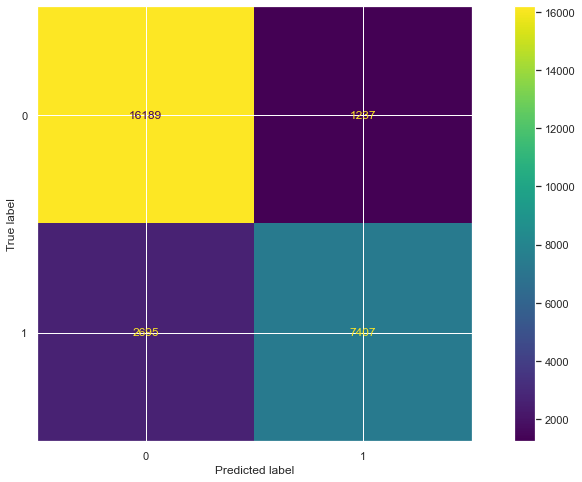

In [385]:
plot_confusion_matrix(rf_gridcv,X_test,y_test)

In [115]:
error_rate = (2695+1237)/(2695+1237+16189+7407)
print(error_rate)

0.14283638477186864


#### NOTICE:
##### Contrary to the pruning technique in Decision tree model, GridSearchCV does actually help decrease error rate from 16.48% to 14.28%! 

>[Go to the winning model selection steps](#win)

## Grid Search for Ran Dom Forest model 2  <a class="anchor" id="gsrf2"></a> <br>
> By knowing the direction of each parameter, I will try to expand range of them as the value that I received from all parameters using Grid Search are 15, 15, 500 which are the minimum and maximum of my scope and by that, I will try increasing and decreasing them to see how far they can actually go to provide a better accuracy. 

In [407]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [500, 800, 1000],  
    'max_depth': [13, 15, 17,],
     'max_features': [10, 15, 20],
    'random_state':[0]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_2 = GridSearchCV(estimator = rf, param_grid = param_grid, scoring='accuracy', 
                          cv = 3, n_jobs = -1)

In [408]:
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [13, 15, 17],
                         'max_features': [10, 15, 20],
                         'n_estimators': [500, 800, 1000],
                         'random_state': [0]},
             scoring='accuracy')

In [409]:
rf_best_param2 = grid_search_2.best_params_
print('best param round 2:',grid_search_2.best_params_)

best param round 2: {'max_depth': 17, 'max_features': 10, 'n_estimators': 500, 'random_state': 0}


In [410]:
grid_search_2.best_score_

0.8650920918068166

In [411]:
rf_gridcv_2 = RandomForestClassifier(n_estimators= rf_best_param2['n_estimators'], 
                               max_depth= rf_best_param2['max_depth'],  
                               random_state= rf_best_param2['random_state'],
                               max_features= rf_best_param2['max_features'] 
                              )

rf_gridcv_2.fit(X_train,y_train)

y_train_pred_class_rf_gridcv_2 = rf_gridcv.predict(X_train)
y_test_pred_class_rf_gridcv_2 = rf_gridcv.predict(X_test)

In [412]:
print("Random Forest with GridsearchCV_2 train accuracy: ", rf_gridcv_2.score(X_train,y_train))
print("Random Forest with GridsearchCV_2 test accuracy: ", rf_gridcv_2.score(X_test,y_test))
print("============")
print("Random Forest with GridsearchCV_2 train roc auc score: ", roc_auc_score(y_train,y_train_pred_class_rf_gridcv_2))
print("Random Forest with GridsearchCV_2 test roc auc score: ", roc_auc_score(y_test,y_test_pred_class_rf_gridcv_2))
print("============")
print(classification_report(y_test, y_test_pred_class_rf_gridcv_2))

Random Forest with GridsearchCV_2 train accuracy:  0.8965887683133786
Random Forest with GridsearchCV_2 test accuracy:  0.8625399593141528
Random Forest with GridsearchCV_2 train roc auc score:  0.8574605613074747
Random Forest with GridsearchCV_2 test roc auc score:  0.8311176305823832
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     17426
           1       0.86      0.73      0.79     10102

    accuracy                           0.86     27528
   macro avg       0.86      0.83      0.84     27528
weighted avg       0.86      0.86      0.85     27528



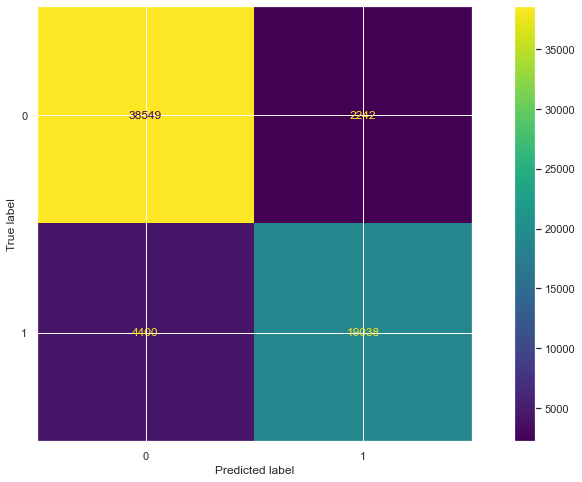

In [413]:
plot_confusion_matrix(rf_gridcv_2,X_train,y_train)

In [116]:
error_rate = (4400+2242)/(4400+2242+38549+19038)
print(error_rate)

0.10341123168662131


#### NOTICE:
##### The error rate continues to improve from 14.28% to only 10.34%! 

In [415]:
class_perf_measures(rf_gridcv_2,X_test,y_test)

threshold     TP     TN     FP    FN  Precision  Recall  Accuracy  MSE
0        0.00  10102      0  17426     0       0.37    1.00      0.37 0.63
1        0.10   9904   8932   8494   198       0.54    0.98      0.68 0.32
2        0.20   9533  11801   5625   569       0.63    0.94      0.77 0.23
3        0.30   8814  14289   3137  1288       0.74    0.87      0.84 0.16
4        0.40   8159  15495   1931  1943       0.81    0.81      0.86 0.14
5        0.50   7572  16172   1254  2530       0.86    0.75      0.86 0.14
6        0.60   6915  16654    772  3187       0.90    0.69      0.86 0.14
7        0.70   5913  17114    312  4189       0.95    0.58      0.84 0.16
8        0.80   5056  17356     70  5046       0.99    0.50      0.81 0.19
9        0.90   4494  17421      5  5608       1.00    0.45      0.80 0.20
10       1.00   3770  17426      0  6332       1.00    0.37      0.77 0.23

## <span style="color:Red"><b>DECISION:<b>
### STOP explore more values to the Random forest model!
#### I think I am finally get the final model for Random Forest as the accuracy and roc& auc score have increased to 86.25% and 83.11%! Moreover, its recall has improved from 71% to 73% which is what I really like to see as well. So, later on, if this is my winning model, I will choose to apply a threshold of 0.4 as it provides best recall in the highest accuracy and minimum MSE!
    
>[Go to the winning model selection steps](#win)

# Grid Search for Artificial Neural Network model<a class="anchor" id="ann"></a> <br>
> I will expand the range of parameter values in each parameter nased on my judegment to see how better the model can be!

In [90]:
# Create the parameter grid based on the results of random search 
param_gridann = {
                'hidden_layer_sizes': [(14),(14,14),(14,14,14)],
                'max_iter': [200, 300],
                'alpha': [0.0001, 0.00005, 0.00001]                    
}
# Create a based model
ANN = MLPClassifier()
# Instantiate the grid search model
grid_searchann = GridSearchCV(estimator = ANN, param_grid = param_gridann, scoring='accuracy',
                          cv = 3, n_jobs = -1)

In [91]:
import warnings
warnings.filterwarnings("ignore")

In [92]:
grid_searchann.fit(X_train_norm, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 5e-05, 1e-05],
                         'hidden_layer_sizes': [14, (14, 14), (14, 14, 14)],
                         'max_iter': [200, 300]},
             scoring='accuracy')

In [93]:
best_param_ann = grid_searchann.best_params_
print('grid_search_ann:',grid_searchann.best_params_)

grid_search_ann: {'alpha': 5e-05, 'hidden_layer_sizes': (14, 14, 14), 'max_iter': 300}


In [94]:
grid_searchann.best_score_

0.8485886034461477

In [95]:
ANN_2 = MLPClassifier(hidden_layer_sizes = best_param_ann['hidden_layer_sizes'], max_iter=best_param_ann['max_iter'],
                      activation='relu', 
                      alpha=best_param_ann['alpha']
                     )

ANN_2.fit(X_train_norm,y_train)

y_pred_prob_ann2 = ANN_2.predict_proba(X_test_norm)[:,1]
y_pred_prob_train_ann2 = ANN_2.predict_proba(X_train_norm)[:,1]
# try change Prob threshold as well
y_pred_class_ann2 = binarize([y_pred_prob_ann2],threshold=0.5)[0]
y_pred_class_train_ann2 = binarize([y_pred_prob_train_ann2],threshold=0.5)[0]
confusion_test=confusion_matrix(y_test,y_pred_class_ann2)
confusion_train=confusion_matrix(y_train,y_pred_class_train_ann2)

print('Train Accuracy: ',metrics.accuracy_score(y_train,y_pred_class_train_ann2).round(2))
print('Test Accuracy: ',metrics.accuracy_score(y_test,y_pred_class_ann2).round(2))
print('Train F1: ',metrics.f1_score(y_train,y_pred_class_train_ann2).round(2))
print('Test F1: ', metrics.f1_score(y_test,y_pred_class_ann2).round(2))

Train Accuracy:  0.86
Test Accuracy:  0.85
Train F1:  0.79
Test F1:  0.78


In [96]:
print("Artificial Neural Network with Grid Search train accuracy: ", ANN_2.score(X_train_norm,y_train))
print("Artificial Neural Network with Grid Search test accuracy: ", ANN_2.score(X_test_norm,y_test))
print("============")
print("Artificial Neural Network with Grid Search train roc auc score: ", roc_auc_score(y_train,y_pred_class_train_ann2))
print("Artificial Neural Network with Grid Search test roc auc score: ", roc_auc_score(y_test,y_pred_class_ann2))
print("============")
print(classification_report(y_test, y_pred_class_ann2))

Artificial Neural Network with Grid Search train accuracy:  0.8567780908935216
Artificial Neural Network with Grid Search test accuracy:  0.8466288869514677
Artificial Neural Network with Grid Search train roc auc score:  0.8323641117098808
Artificial Neural Network with Grid Search test roc auc score:  0.8218398207672308
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     17426
           1       0.83      0.73      0.78     10102

    accuracy                           0.85     27528
   macro avg       0.84      0.82      0.83     27528
weighted avg       0.85      0.85      0.84     27528



In [117]:
class_perf_measures(ANN_2,X_test,y_test)

threshold     TP     TN     FP    FN  Precision  Recall  Accuracy  MSE
0        0.00  10102      0  17426     0       0.37    1.00      0.37 0.63
1        0.10   7978   8053   9373  2124       0.46    0.79      0.58 0.42
2        0.20   7909   8199   9227  2193       0.46    0.78      0.59 0.41
3        0.30   7859   8287   9139  2243       0.46    0.78      0.59 0.41
4        0.40   7838   8351   9075  2264       0.46    0.78      0.59 0.41
5        0.50   7811   8421   9005  2291       0.46    0.77      0.59 0.41
6        0.60   7793   8475   8951  2309       0.47    0.77      0.59 0.41
7        0.70   7773   8545   8881  2329       0.47    0.77      0.59 0.41
8        0.80   7733   8615   8811  2369       0.47    0.77      0.59 0.41
9        0.90   7688   8703   8723  2414       0.47    0.76      0.60 0.40
10       1.00   6338  11082   6344  3764       0.50    0.63      0.63 0.37

#### Question for curiosity:
> Why my threshold accuracy looks weird? With GridSearchCV, I should get to see the improvement in the accuracy, so why is that? 

## <span style="color:Red"><b> DECISION: <br>
### STOP: We get the final accuracy for ANN. (I stop further the GridSearchCV as although the accuracy and AUC& RUC has improved, it still improved less than the first model of Random Forest with GridSearchCV. Therefore, there is no point of exploreing more parameter values)
>[Go to the winning model selection steps](#win)

# <span style="color:Red"><b> ** FINAL WINNING MODEL DECISION **:

##  Random Forest with GridSearchCV (2nd time) is what I choose as my winning model!

#### To get the best quality, I will apply threshold= 0.4 in the model to get the best result as I intent to do so.

In [428]:
rf_gridcv_final = RandomForestClassifier(n_estimators= rf_best_param2['n_estimators'], 
                               max_depth= rf_best_param2['max_depth'],  
                               random_state= rf_best_param2['random_state'],
                               max_features= rf_best_param2['max_features'] 
                              )

rf_gridcv_final.fit(X_train,y_train)

y_pred_prob_test_final = rf_gridcv_final.predict_proba(X_test)[:,1]
y_pred_prob_train_final = rf_gridcv_final.predict_proba(X_train)[:,1]
# try change Prob threshold as well
y_pred_class_test_final = binarize([y_pred_prob_test_final],threshold=0.4)[0]          # Changing threshold to 0.4 instead!
y_pred_class_train_final = binarize([y_pred_prob_train_final],threshold=0.4)[0]

In [429]:
print("Final model from Random Forest with GridsearchCV_2 train accuracy: ", rf_gridcv_final.score(X_train,y_train))
print("Final model from Random Forest with GridsearchCV_2 test accuracy: ", rf_gridcv_final.score(X_test,y_test))
print("============")
print("Final model from Random Forest with GridsearchCV_2 train roc auc score: ", roc_auc_score(y_train,y_pred_class_train_final))
print("Final model from Random Forest with GridsearchCV_2 test roc auc score: ", roc_auc_score(y_test,y_pred_class_test_final))
print("============")
print(classification_report(y_test,y_pred_class_test_final))

Final model from Random Forest with GridsearchCV_2 train accuracy:  0.8965887683133786
Final model from Random Forest with GridsearchCV_2 test accuracy:  0.8625399593141528
Final model from Random Forest with GridsearchCV_2 train roc auc score:  0.8940909635350315
Final model from Random Forest with GridsearchCV_2 test roc auc score:  0.8484252089720089
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17426
           1       0.81      0.81      0.81     10102

    accuracy                           0.86     27528
   macro avg       0.85      0.85      0.85     27528
weighted avg       0.86      0.86      0.86     27528



In [430]:
rf_gridcv_final.feature_importances_

array([0.16146194, 0.01378462, 0.00390863, 0.05731715, 0.01111571,
       0.02338057, 0.00295147, 0.11145354, 0.02211773, 0.03975992,
       0.0547074 , 0.0210234 , 0.01106486, 0.00330529, 0.00390083,
       0.09808853, 0.0064103 , 0.01016856, 0.00577447, 0.02444776,
       0.27040902, 0.0434483 ])

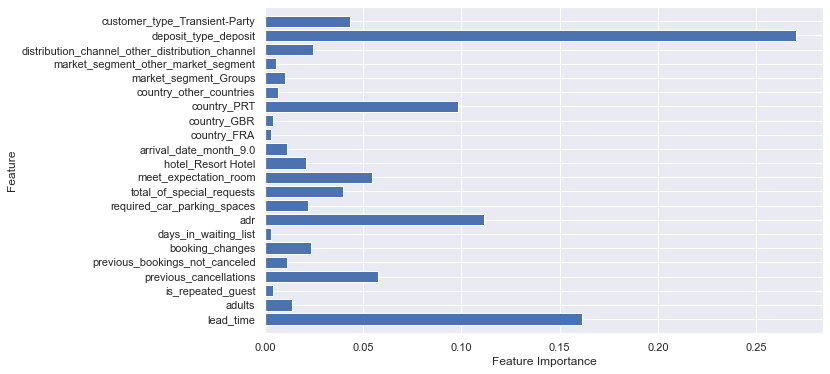

In [431]:
def plot_feature_importances(data,model):
    n_features = data.shape[1]
    fig = plt.figure(figsize=(10,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances(X_train,rf_gridcv_final)

# <span style="color:green"><b> In conclusion:
###  What are the minimum required data for this RF model?
>- According to the feature_importance results above, this Random Forest model needs deposit_type_deposit, lead_time, adr, country_prt, previous_cancellations, meet_expectation_room, customer_type_Transient-Party and total_of_special_requests. These 8 features are what I think is a minimum required data as they have the most outstanding correlation to whether the guests will cancel the hotel reservation or not. 
>- In terms of number of raw data to perform this model, according to this [LINK](https://machinelearningmastery.com/much-training-data-required-machine-learning/), I think there is no minimum of required data, the more you can find, there is a better chance that the accuracy can be higher since my model can explore and learn more. Also, the more data you can find, the more correlation between feature and output it can be. By that, maybe I can have more features to input into my model and help expand more characteristics that effect the cancellation decision. 

###  What is a run-time information for this RF model?
>- As I reduced the detailed range of possible parameter values to reduce run-time while tried to maintain the best results as much as I can, I be able to run my model within 20 minutes in total! I know it is too short and there might be values that help achieving more higher accuracy and recall that I focus on. However, the time is limited so, I choose to improve the best model in a proper timeframe instead.  


# 6. Deployment of Model <a class="anchor" id="model-deployment"></a>
> A list of recommendations for my employer

### What can they do or should they do with the model I have provided?
- First thing they need to do is asking me! However, they should use my model to see the prediction of how likely any particular guests will cancel their hotel reservaton or not based on their feature's characteristic. If the result is 'cancel!', they can focus on increase other guests that already stayed in the hotel and those that are likely to not cancel's experiences first and later on taking actions from calling those in 'cancel' group to confirm their decisions to taking care the group in case the prediction is wrong and they decide to come such as prepare the accommodation together with the special requests later on . This can help my employer to be precautious and act early to prevent bad customer experience which is the last thing the hotels would want!

#### Process flow:
- Either I give this model to a UI team and let them create an official website to allow staffs to use them to predict the outcome base on all features and 40% threshold or I, as a data scientist of the company, will help provide outcome from my model prediction, download the results in an electronic form such as excel then send directly to management team to help see the tendency and cope with the issue in time
> If it is the first process flow, apart from explain that myself to the UI team, I might create an easy website example such as streamlit to help make UI team understand what they should design with 

###  Do I have any concerns about the data or classification model?
- Yes, with this short period of time, I know for sure that my data can be cleaner than this. Even though, I have tried doing the research and think through every steps possible, I still do not have time to run a GridSearchCV in more detail range + cv=5 as my computer tends to crash everytime. Therefore, I believe the accuracy 86.25% and recall + f-1 score of 81% can be improved!! However, my concern is that there are still left with 13.75% of mistake that can occur and 19% of wrong prediction in recall although using the best threshold to classify. Therefore, this model still has its error so, be careful when using it! 
>[Go to the Top](#table-of-content)